# Наилучшее соответствие $H_{\alpha}$ & $Q_{eff}$

In [2]:
import os
import numpy as np

%pylab
%matplotlib inline
%run ./load_notebook.py

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
Qeff_min = np.load('./data/Qeff_min.npy')
Qeff_max = np.load('./data/Qeff_max.npy')
Qg = np.load('./data/Qg.npy')
H_alpha = np.load('./data/H_alpha.npy')
dist_kpc = np.load('./data/dist_kpc.npy')
sigma_s = np.load('./data/sigma_s.npy')

## $\chi^2$

In [3]:
def chisqg(ydata,ymod,sd=None):   
    if sd==None:  
        chisq=numpy.sum((ydata-ymod)**2)  
    else:  
        chisq=numpy.sum( ((ydata-ymod)/sd)**2 )  
    return chisq  


Text(0.5, 1.0, '$Q_{max}$')

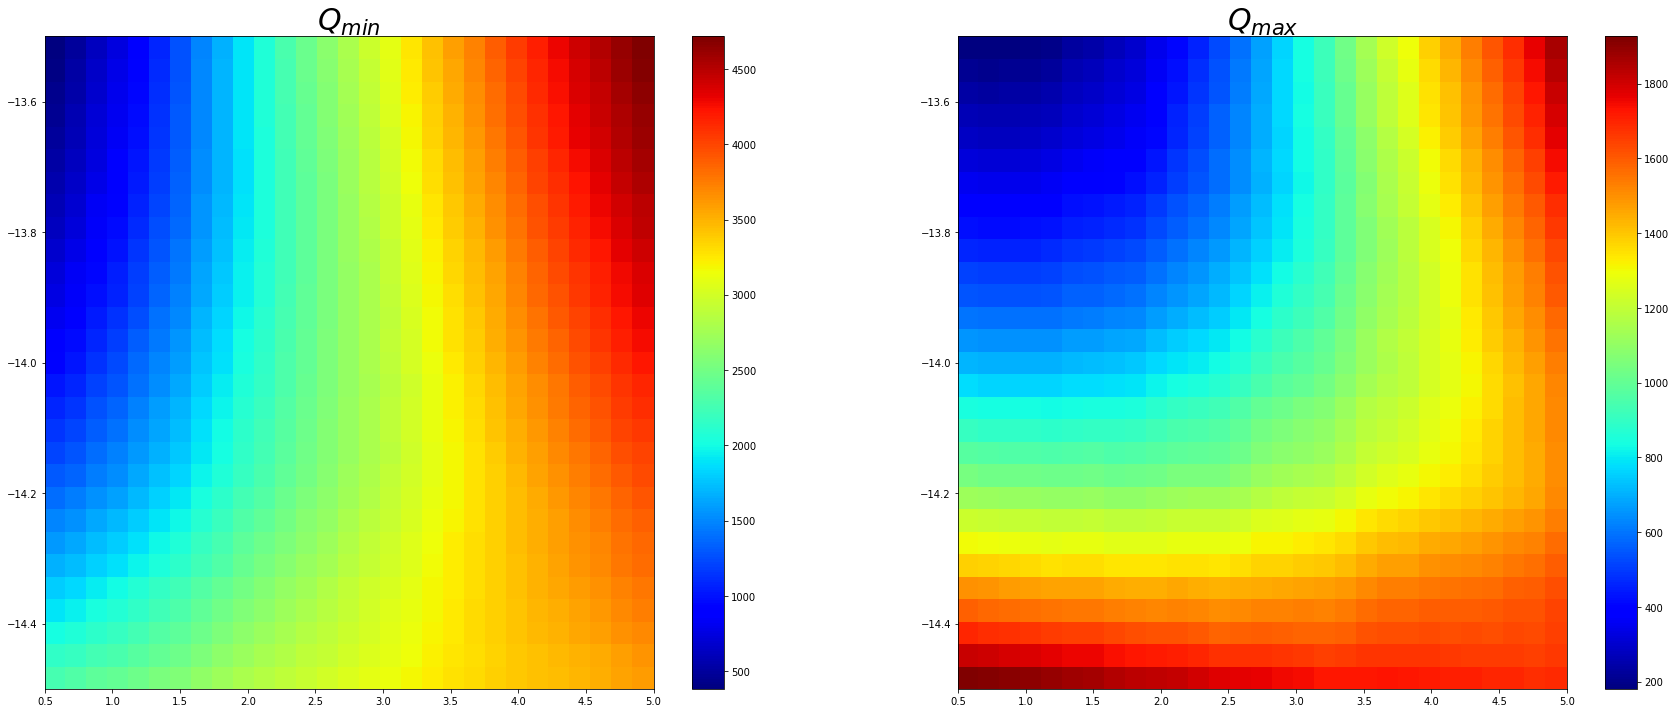

In [4]:
fig = plt.figure(figsize=[30, 12])

plt.subplot(1,2,1)
corr_coeffs = np.zeros((30,30))
for i, qlim in enumerate(np.linspace(0.5, 5., 30)):
    for j, hlim in enumerate(np.linspace(-14.5, -13.5, 30)):
        mask = (sigma_s != 0.)
        corr_coeffs[j][i] = chisqg(np.array([1 if l < qlim else 0 for l in Qeff_min[mask].ravel()]), 
                                   np.array([1 if l > hlim else 0 for l in np.log10(H_alpha)[mask].ravel()]))
        
xx, yy = np.meshgrid(np.linspace(0.5, 5., 30), np.linspace(-14.5, -13.5, 30))
quadmesh = plt.pcolormesh(xx, yy, corr_coeffs, cmap='jet')
# quadmesh.set_clim(vmin=-0.5, vmax=0.5)
plt.colorbar()
plt.title(r'$Q_{min}$', fontsize=30)

plt.subplot(1,2,2)
corr_coeffs = np.zeros((30,30))
for i, qlim in enumerate(np.linspace(0.5, 5., 30)):
    for j, hlim in enumerate(np.linspace(-14.5, -13.5, 30)):
        mask = (sigma_s != 0.) & (dist_kpc < 5.)
        corr_coeffs[j][i] = chisqg(np.array([1 if l < qlim else 0 for l in Qeff_max[mask].ravel()]), 
                                   np.array([1 if l > hlim else 0 for l in np.log10(H_alpha)[mask].ravel()]))
        
xx, yy = np.meshgrid(np.linspace(0.5, 5., 30), np.linspace(-14.5, -13.5, 30))
quadmesh = plt.pcolormesh(xx, yy, corr_coeffs, cmap='jet')
# quadmesh.set_clim(vmin=-0.5, vmax=0.5)
plt.colorbar()
plt.title(r'$Q_{max}$', fontsize=30)



/home/lera/.local/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)


Text(0.5, 1.0, '$Q_{eff}^{max}$')

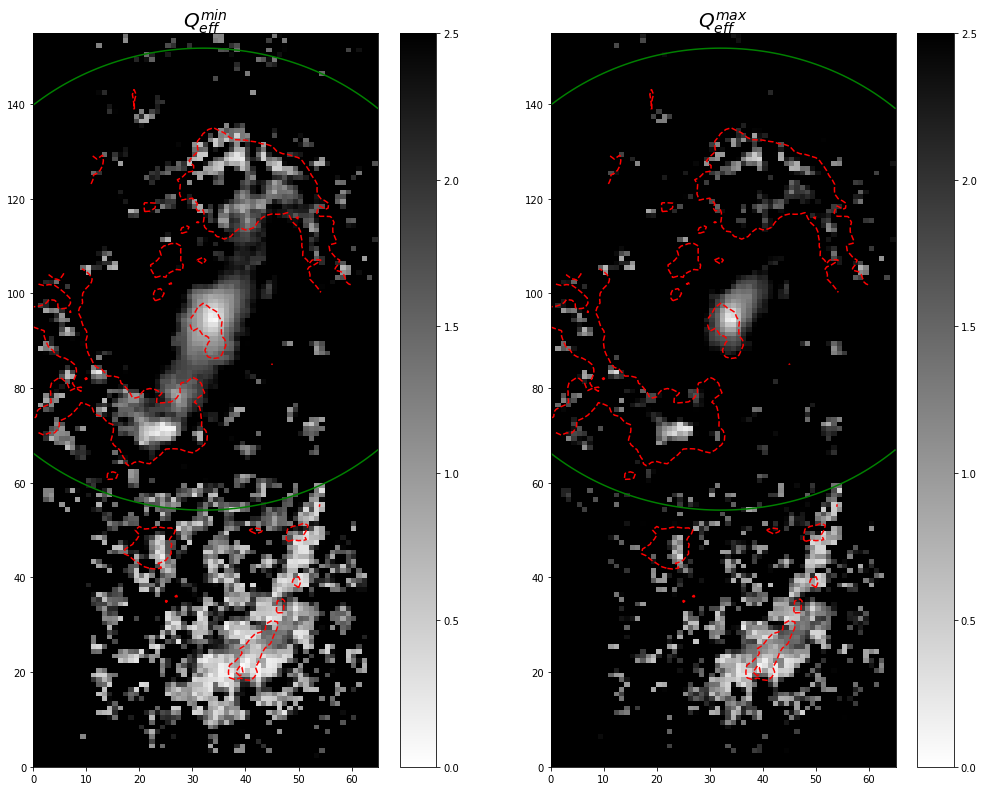

In [5]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, dist_kpc, levels=[0,5], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=0., vmax=2.5)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, dist_kpc, levels=[0,5], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=0., vmax=2.5)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)


вне 5 кпк всё не очень хорошо, попробуем при нашем статистическом исследовании отбросить всё, что находится вне этого круга и посмотрим, что из этого выйдет

Text(0.5, 1.0, '$Q_{max}$')

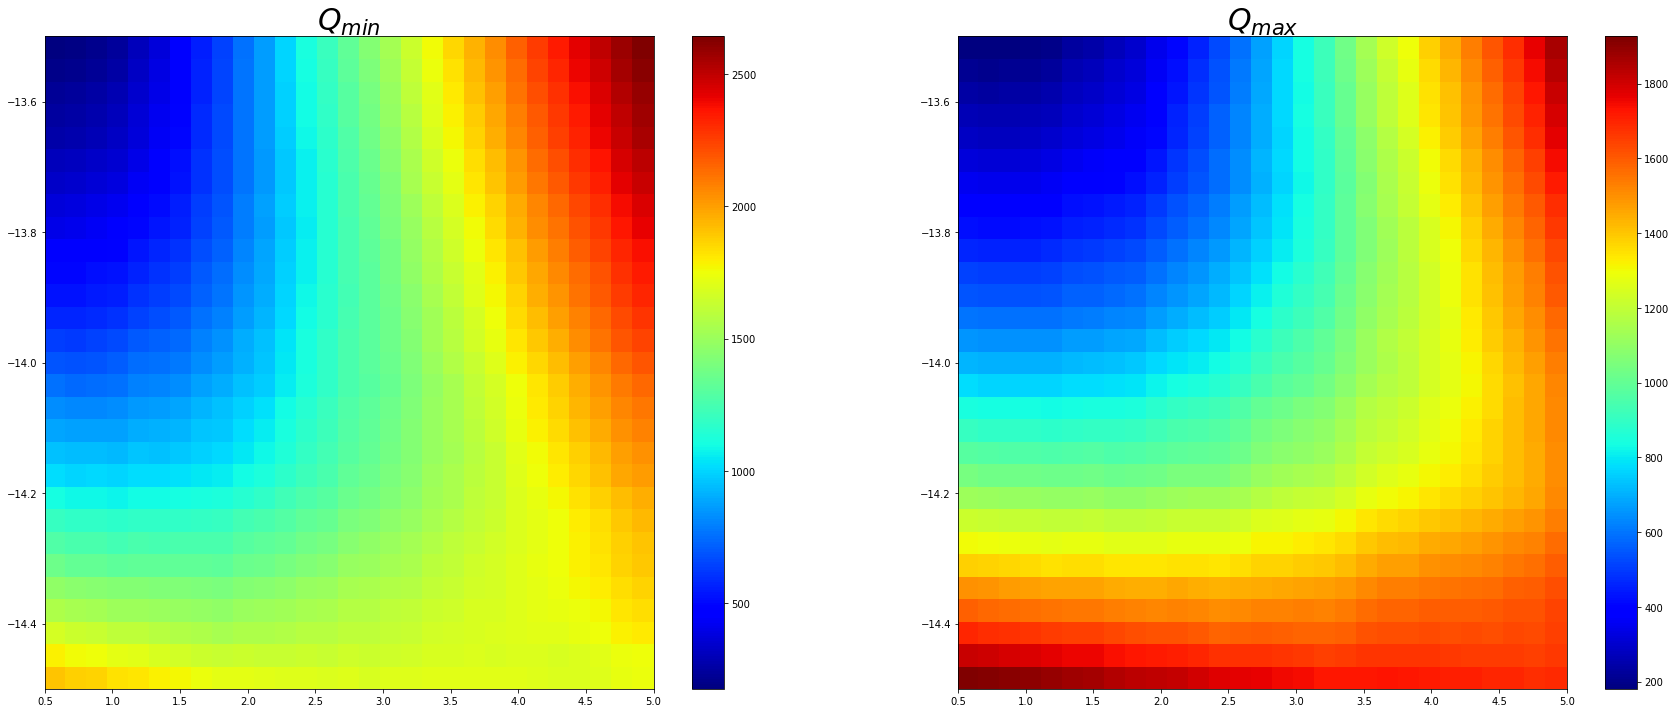

In [6]:
fig = plt.figure(figsize=[30, 12])

plt.subplot(1,2,1)
corr_coeffs = np.zeros((30,30))
for i, qlim in enumerate(np.linspace(0.5, 5., 30)):
    for j, hlim in enumerate(np.linspace(-14.5, -13.5, 30)):
        mask = (sigma_s != 0.) & (dist_kpc < 5.)
        corr_coeffs[j][i] = chisqg(np.array([1 if l < qlim else 0 for l in Qeff_min[mask].ravel()]), 
                                   np.array([1 if l > hlim else 0 for l in np.log10(H_alpha)[mask].ravel()]))
        
xx, yy = np.meshgrid(np.linspace(0.5, 5., 30), np.linspace(-14.5, -13.5, 30))
quadmesh = plt.pcolormesh(xx, yy, corr_coeffs, cmap='jet')
# quadmesh.set_clim(vmin=-0.5, vmax=0.5)
plt.colorbar()
plt.title(r'$Q_{min}$', fontsize=30)

plt.subplot(1,2,2)
corr_coeffs = np.zeros((30,30))
for i, qlim in enumerate(np.linspace(0.5, 5., 30)):
    for j, hlim in enumerate(np.linspace(-14.5, -13.5, 30)):
        mask = (sigma_s != 0.) & (dist_kpc < 5.)
        corr_coeffs[j][i] = chisqg(np.array([1 if l < qlim else 0 for l in Qeff_max[mask].ravel()]), 
                                   np.array([1 if l > hlim else 0 for l in np.log10(H_alpha)[mask].ravel()]))
        
xx, yy = np.meshgrid(np.linspace(0.5, 5., 30), np.linspace(-14.5, -13.5, 30))
quadmesh = plt.pcolormesh(xx, yy, corr_coeffs, cmap='jet')
# quadmesh.set_clim(vmin=-0.5, vmax=0.5)
plt.colorbar()
plt.title(r'$Q_{max}$', fontsize=30)



Попробуем найти precision, recall и F1 из http://bazhenov.me/blog/2012/07/21/classification-performance-evaluation.html

$$precision = \frac{TP}{TP+FP}$$ 

$$recall = \frac{TP}{TP+FN}$$ 

$$F1 = 2 \frac{precision \cdot recall}{precision + recall}$$

### Найдём соответствующие величины для $Q_{eff}^{min}$

In [5]:
precision_Qmin=np.zeros((50,50))
recall_Qmin = np.zeros((50,50))
F1_Qmin = np.zeros((50,50))

for i, qlim in enumerate(np.linspace(0.5, 5., 50)):
    for j, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1 
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmin[i][j] = TP/(TP + FP)
        recall_Qmin[i][j] = TP/(TP + FN)
        F1_Qmin[i][j] = 2*precision_Qmin[i][j] * recall_Qmin[i][j]/(precision_Qmin[i][j] + recall_Qmin[i][j])
                    

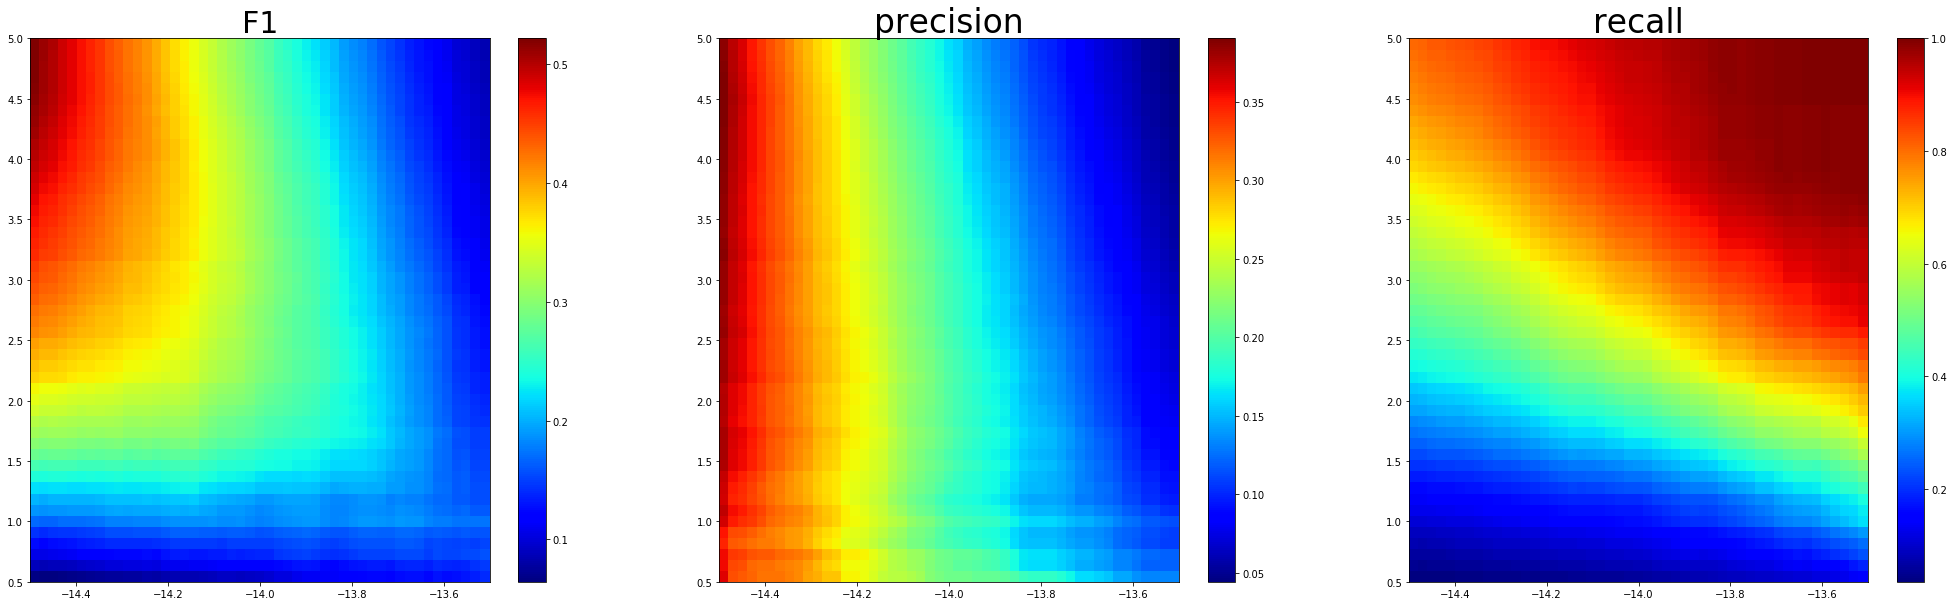

In [3]:
F1_Qmin = np.load('./data/F1_Qmin.npy')
precision_Qmin = np.load('./data/precision_Qmin.npy')
recall_Qmin = np.load('./data/recall_Qmin.npy')
xx, yy = np.meshgrid(np.linspace(-14.5, -13.5, 50), np.linspace(0.5, 5., 50))
fig = plt.figure(figsize=[35, 10])

plt.subplot(1,3,1)
quadmesh = plt.pcolormesh(xx, yy, F1_Qmin, cmap='jet')
plt.title('F1', fontsize=30)
plt.colorbar()
          
plt.subplot(1,3,2)
quadmesh = plt.pcolormesh(xx, yy, precision_Qmin, cmap='jet')
plt.title('precision', fontsize=33)
plt.colorbar()
          
plt.subplot(1,3,3)
quadmesh = plt.pcolormesh(xx, yy, recall_Qmin, cmap='jet')
plt.title('recall', fontsize=33)
plt.colorbar()       
          

### Для $Q_{eff}^{max}$

In [9]:
precision_Qmax=np.zeros((50,50))
recall_Qmax = np.zeros((50,50))
F1_Qmax = np.zeros((50,50))

for i, qlim in enumerate(np.linspace(0.5, 5., 50)):
    for j, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_max[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmax[i][j] = TP/(TP + FP)
        recall_Qmax[i][j] = TP/(TP + FN)
        F1_Qmax[i][j] = 2*precision_Qmax[i][j] * recall_Qmax[i][j]/(precision_Qmax[i][j] + recall_Qmax[i][j])
                    
            
            

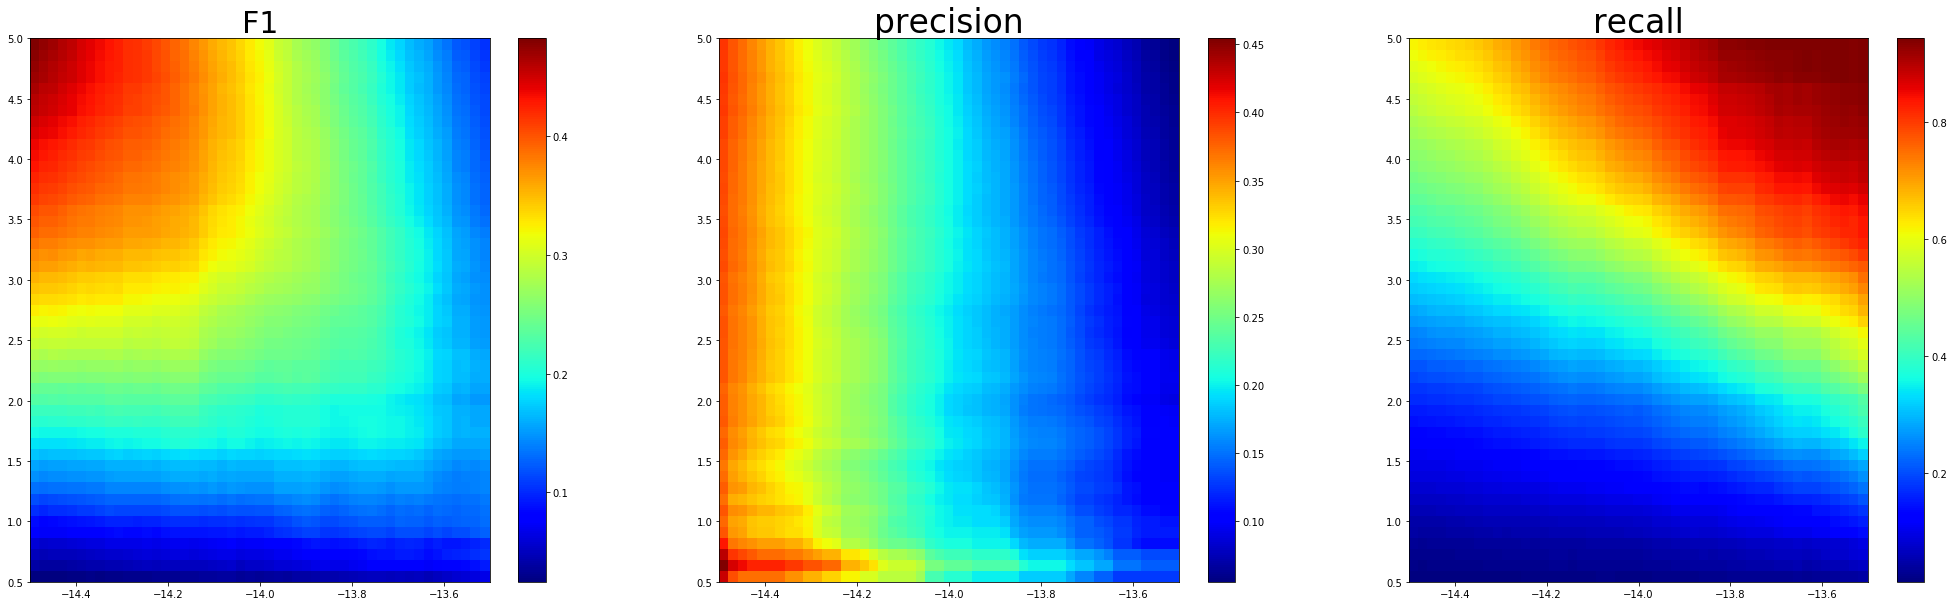

In [4]:
F1_Qmax = np.load('./data/F1_Qmax.npy')
precision_Qmax = np.load('./data/precision_Qmax.npy')
recall_Qmax = np.load('./data/recall_Qmax.npy')
xx, yy = np.meshgrid(np.linspace(-14.5, -13.5, 50), np.linspace(0.5, 5., 50))
fig = plt.figure(figsize=[35, 10])

plt.subplot(1,3,1)
quadmesh = plt.pcolormesh(xx, yy, F1_Qmax, cmap='jet')
plt.title('F1', fontsize=30)
plt.colorbar()
          
plt.subplot(1,3,2)
quadmesh = plt.pcolormesh(xx, yy, precision_Qmax, cmap='jet')
plt.title('precision', fontsize=33)
plt.colorbar()
          
plt.subplot(1,3,3)
quadmesh = plt.pcolormesh(xx, yy, recall_Qmax, cmap='jet')
plt.title('recall', fontsize=33)
plt.colorbar() 

### Для $Q_{gas}$

In [5]:
precision_Qg=np.zeros((50,50))
recall_Qg = np.zeros((50,50))
F1_Qg = np.zeros((50,50))

for i, qlim in enumerate(np.linspace(0.5, 5., 50)):
    for j, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 1
        FP = 1
        FN = 1
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qg[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qg[i][j] = TP/(TP + FP)
        recall_Qg[i][j] = TP/(TP + FN)
        F1_Qg[i][j] = 2*precision_Qg[i][j] * recall_Qg[i][j]/(precision_Qg[i][j] + recall_Qg[i][j])
                    

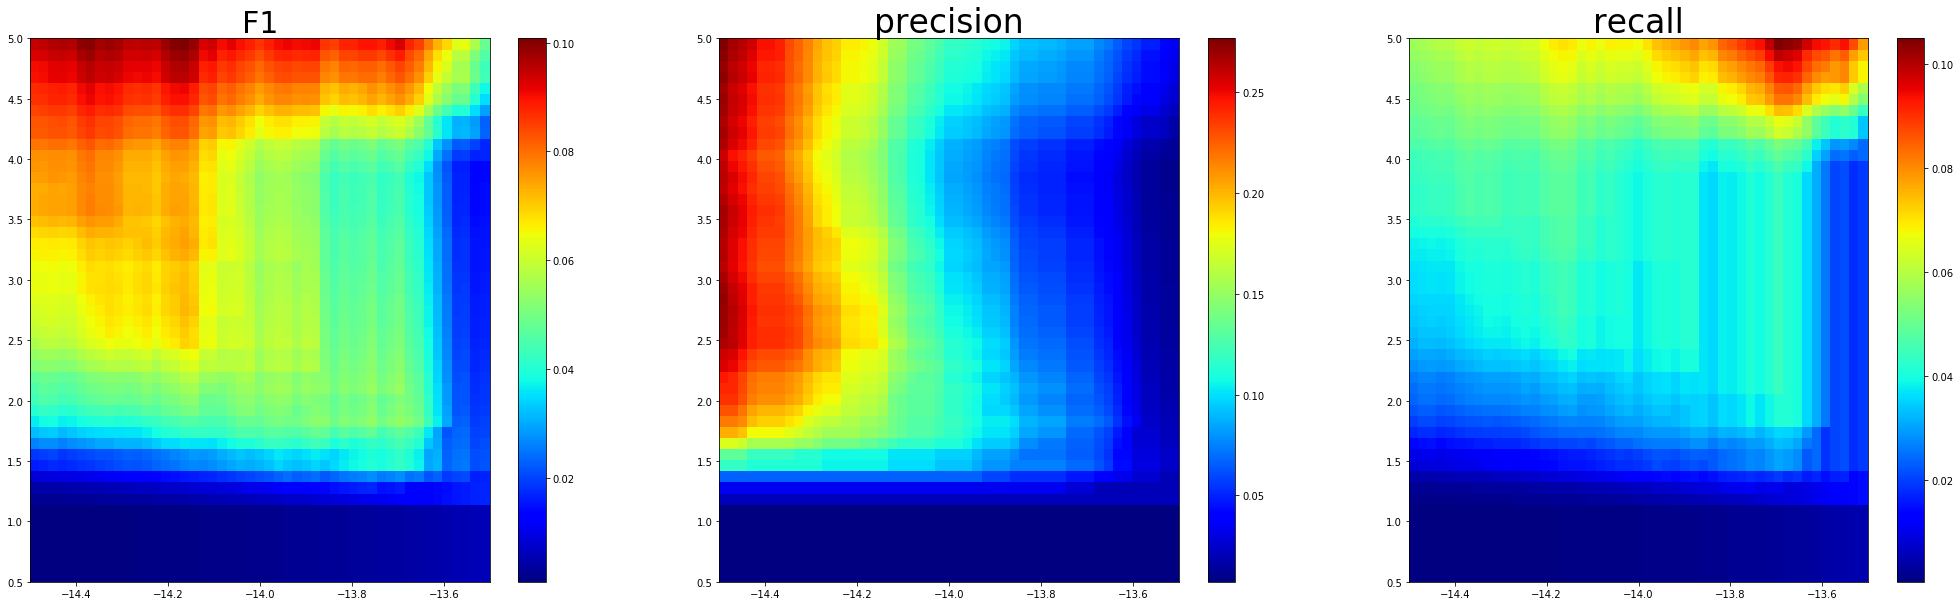

In [7]:
F1_Qg = np.load('./data/F1_Qg.npy')
precision_Qg = np.load('./data/precision_Qg.npy')
recall_Qg = np.load('./data/recall_Qg.npy')

xx, yy = np.meshgrid(np.linspace(-14.5, -13.5, 50), np.linspace(0.5, 5., 50))
fig = plt.figure(figsize=[35, 10])

plt.subplot(1,3,1)
quadmesh = plt.pcolormesh(xx, yy, F1_Qg, cmap='jet')
plt.title('F1', fontsize=30)
plt.colorbar()
          
plt.subplot(1,3,2)
quadmesh = plt.pcolormesh(xx, yy, precision_Qg, cmap='jet')
plt.title('precision', fontsize=33)
plt.colorbar()
          
plt.subplot(1,3,3)
quadmesh = plt.pcolormesh(xx, yy, recall_Qg, cmap='jet')
plt.title('recall', fontsize=33)
plt.colorbar()

In [6]:
np.save('./data/precision_Qg.npy',precision_Qg)
np.save('./data/recall_Qg.npy',recall_Qg)
np.save('./data/F1_Qg.npy',F1_Qg)
np.save('./data/precision_Qmin.npy',precision_Qmin)
np.save('./data/recall_Qmin.npy',recall_Qmin)
np.save('./data/F1_Qmin.npy',F1_Qmin)
np.save('./data/precision_Qmax.npy',precision_Qmax)
np.save('./data/recall_Qmax.npy',recall_Qmax)
np.save('./data/F1_Qmax.npy',F1_Qmax)

Теперь попробуем откинуть всё, что находится дальше, чем 5 кпк от центра галактики. Посмотрим только для $Q_{eff}^{min}$

In [7]:
precision_Qmin_cut=np.zeros((50,50))
recall_Qmin_cut = np.zeros((50,50))
F1_Qmin_cut = np.zeros((50,50))

for i, qlim in enumerate(np.linspace(0.5, 5., 50)):
    for j, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                if (dist_kpc[k][l] <= 5): 
                    if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                        TP+=1
                    
                    if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                        FN+=1
                
                    if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                        FP+=1
         
        precision_Qmin_cut[i][j] = TP/(TP + FP)
        recall_Qmin_cut[i][j] = TP/(TP + FN)
        F1_Qmin_cut[i][j] = 2*precision_Qmin_cut[i][j] * recall_Qmin_cut[i][j]/(precision_Qmin_cut[i][j] + recall_Qmin_cut[i][j])

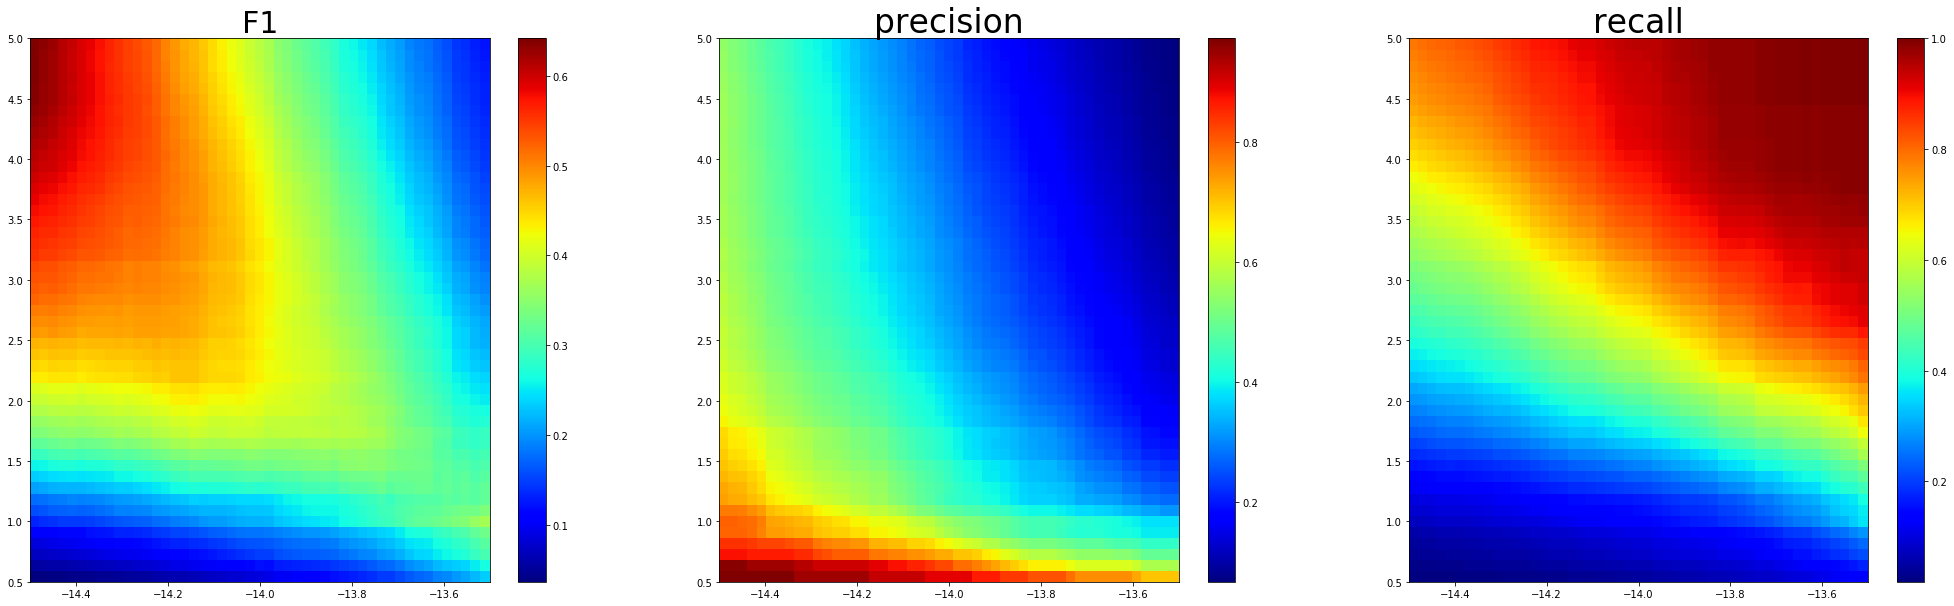

In [8]:
xx, yy = np.meshgrid(np.linspace(-14.5, -13.5, 50), np.linspace(0.5, 5., 50))
fig = plt.figure(figsize=[35, 10])

plt.subplot(1,3,1)
quadmesh = plt.pcolormesh(xx, yy, F1_Qmin_cut, cmap='jet')
plt.title('F1', fontsize=30)
plt.colorbar()
          
plt.subplot(1,3,2)
quadmesh = plt.pcolormesh(xx, yy, precision_Qmin_cut, cmap='jet')
plt.title('precision', fontsize=33)
plt.colorbar()
          
plt.subplot(1,3,3)
quadmesh = plt.pcolormesh(xx, yy, recall_Qmin_cut, cmap='jet')
plt.title('recall', fontsize=33)
plt.colorbar()  

В принципе координально ничего не поменялось

Теперь посмотрим, как будут меняться эти величины при Qlim=1,2,3 

In [10]:
precision_Qg1 = []
recall_Qg1 = []
F1_Qg1 = []
precision_Qmin1 = []
recall_Qmin1 = []
F1_Qmin1 = []
precision_Qmax1 = []
recall_Qmax1 = []
F1_Qmax1 = []

qlim = 1
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 1
        FP = 1
        FN = 1
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qg[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qg1.append(TP/(TP + FP))
        recall_Qg1.append(TP/(TP + FN))
        F1_Qg1.append(2*precision_Qg1[i] * recall_Qg1[i]/(precision_Qg1[i] + recall_Qg1[i]))
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmin1.append(TP/(TP + FP))
        recall_Qmin1.append(TP/(TP + FN))
        F1_Qmin1.append(2*precision_Qmin1[i] * recall_Qmin1[i]/(precision_Qmin1[i] + recall_Qmin1[i])) 
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_max[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmax1.append(TP/(TP + FP))
        recall_Qmax1.append(TP/(TP + FN))
        F1_Qmax1.append(2*precision_Qmax1[i] * recall_Qmax1[i]/(precision_Qmax1[i] + recall_Qmax1[i]))                

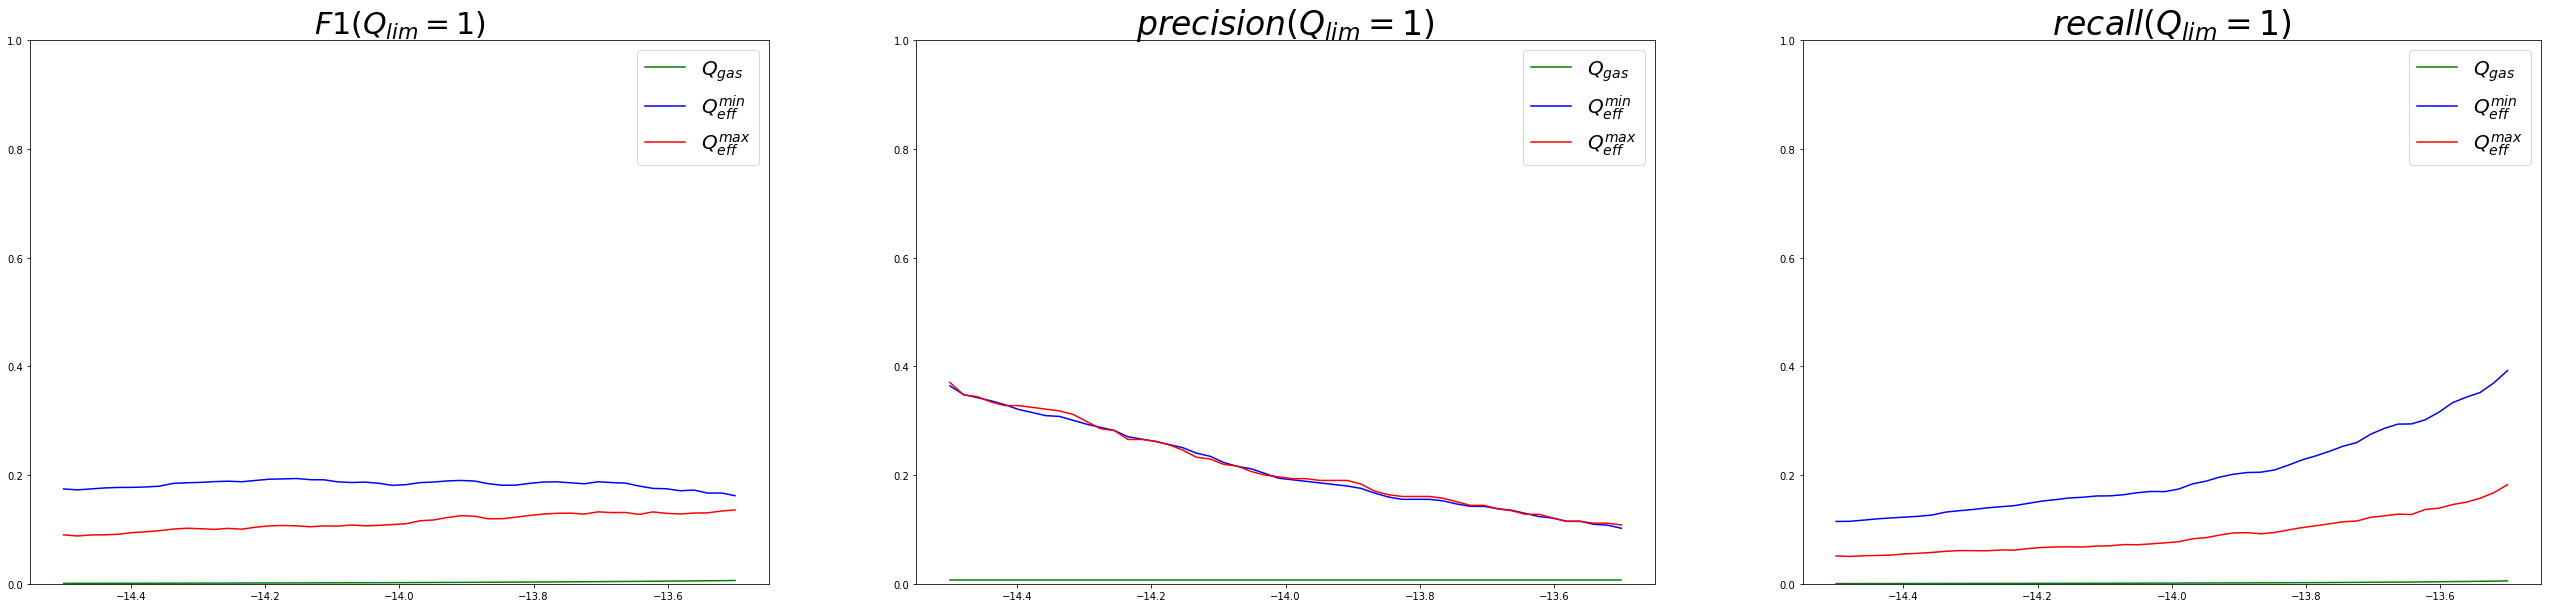

In [11]:
xx =np.array(np.linspace(-14.5, -13.5, 50))
fig = plt.figure(figsize=[45, 10])

plt.subplot(1,3,1)
plt.plot(xx,F1_Qg1,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,F1_Qmin1,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,F1_Qmax1,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$F1(Q_{lim} = 1)$', fontsize=30)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,2)
plt.plot(xx,precision_Qg1,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,precision_Qmin1,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,precision_Qmax1,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$precision(Q_{lim} = 1)$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,3)
plt.plot(xx,recall_Qg1,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,recall_Qmin1,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,recall_Qmax1,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.ylim(0.,1.)
plt.title(r'$recall(Q_{lim} = 1)$', fontsize=33)

plt.legend(fontsize = 20)
 

In [12]:
precision_Qg2 = []
recall_Qg2 = []
F1_Qg2 = []
precision_Qmin2 = []
recall_Qmin2 = []
F1_Qmin2 = []
precision_Qmax2 = []
recall_Qmax2 = []
F1_Qmax2 = []

qlim = 2
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 1
        FP = 1
        FN = 1
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qg[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qg2.append(TP/(TP + FP))
        recall_Qg2.append(TP/(TP + FN))
        F1_Qg2.append(2*precision_Qg2[i] * recall_Qg2[i]/(precision_Qg2[i] + recall_Qg2[i]))
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmin2.append(TP/(TP + FP))
        recall_Qmin2.append(TP/(TP + FN))
        F1_Qmin2.append(2*precision_Qmin2[i] * recall_Qmin2[i]/(precision_Qmin2[i] + recall_Qmin2[i])) 
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_max[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmax2.append(TP/(TP + FP))
        recall_Qmax2.append(TP/(TP + FN))
        F1_Qmax2.append(2*precision_Qmax2[i] * recall_Qmax2[i]/(precision_Qmax2[i] + recall_Qmax2[i]))                

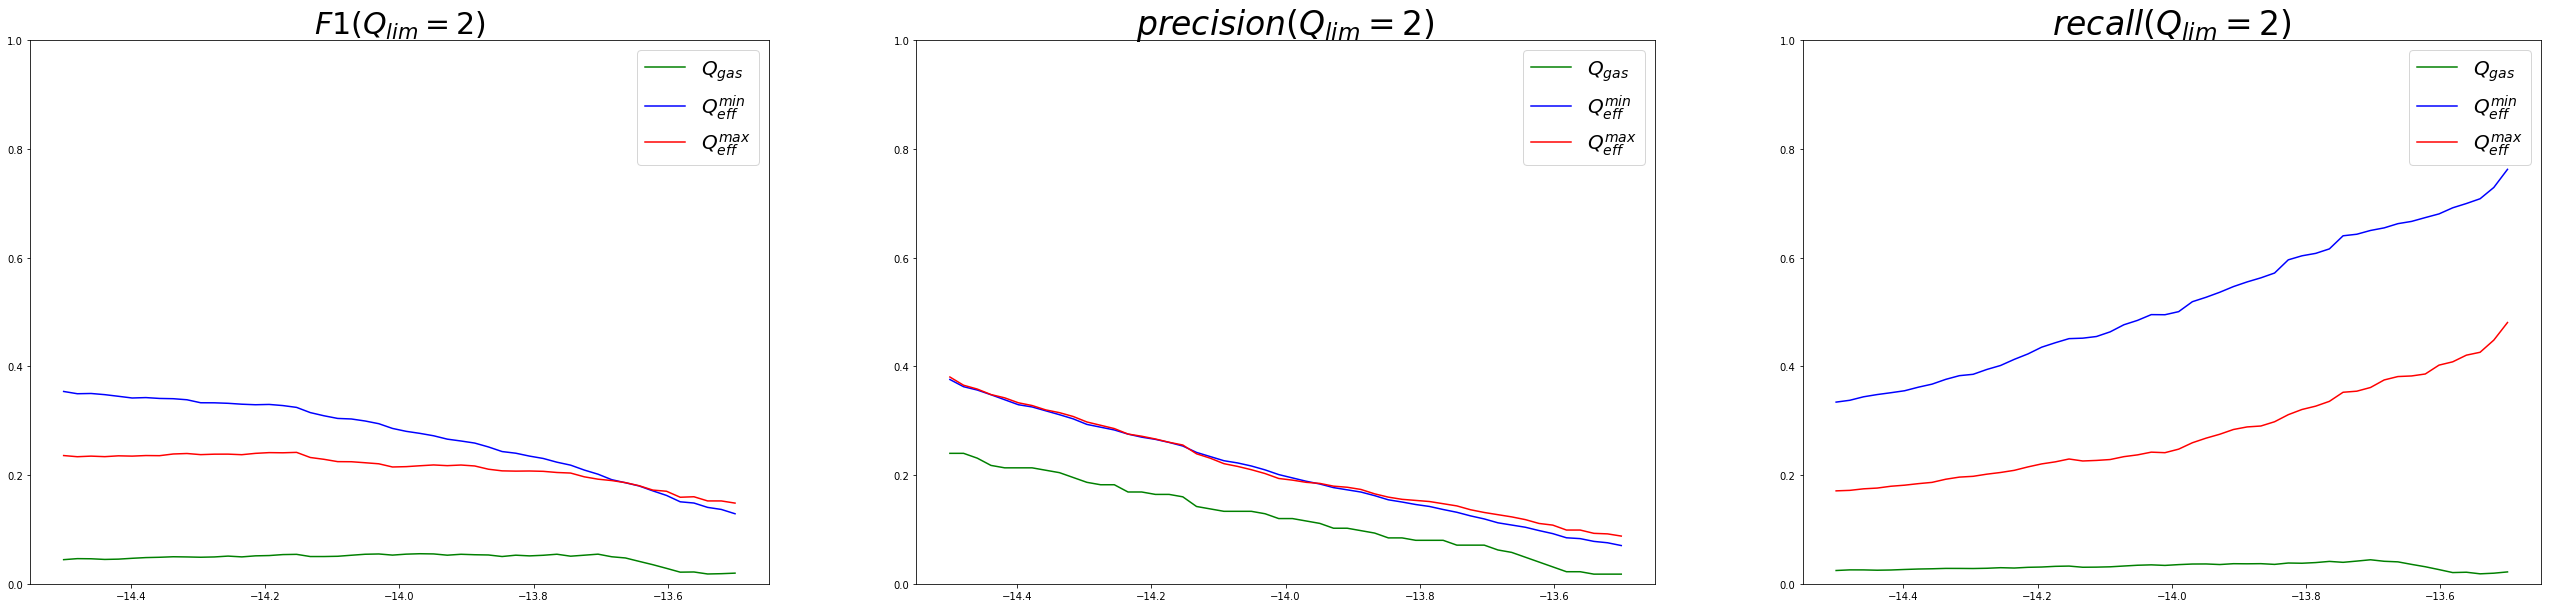

In [13]:
xx =np.array(np.linspace(-14.5, -13.5, 50))
fig = plt.figure(figsize=[45, 10])

plt.subplot(1,3,1)
plt.plot(xx,F1_Qg2,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,F1_Qmin2,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,F1_Qmax2,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$F1(Q_{lim} = 2)$', fontsize=30)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,2)
plt.plot(xx,precision_Qg2,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,precision_Qmin2,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,precision_Qmax2,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$precision(Q_{lim} = 2)$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,3)
plt.plot(xx,recall_Qg2,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,recall_Qmin2,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,recall_Qmax2,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$recall(Q_{lim} = 2)$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20) 

In [14]:
precision_Qg3 = []
recall_Qg3 = []
F1_Qg3 = []
precision_Qmin3 = []
recall_Qmin3 = []
F1_Qmin3 = []
precision_Qmax3 = []
recall_Qmax3 = []
F1_Qmax3 = []

qlim = 3
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 1
        FP = 1
        FN = 1
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qg[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qg3.append(TP/(TP + FP))
        recall_Qg3.append(TP/(TP + FN))
        F1_Qg3.append(2*precision_Qg3[i] * recall_Qg3[i]/(precision_Qg3[i] + recall_Qg3[i]))
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmin3.append(TP/(TP + FP))
        recall_Qmin3.append(TP/(TP + FN))
        F1_Qmin3.append(2*precision_Qmin3[i] * recall_Qmin3[i]/(precision_Qmin3[i] + recall_Qmin3[i])) 
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_max[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmax3.append(TP/(TP + FP))
        recall_Qmax3.append(TP/(TP + FN))
        F1_Qmax3.append(2*precision_Qmax3[i] * recall_Qmax3[i]/(precision_Qmax3[i] + recall_Qmax3[i])) 

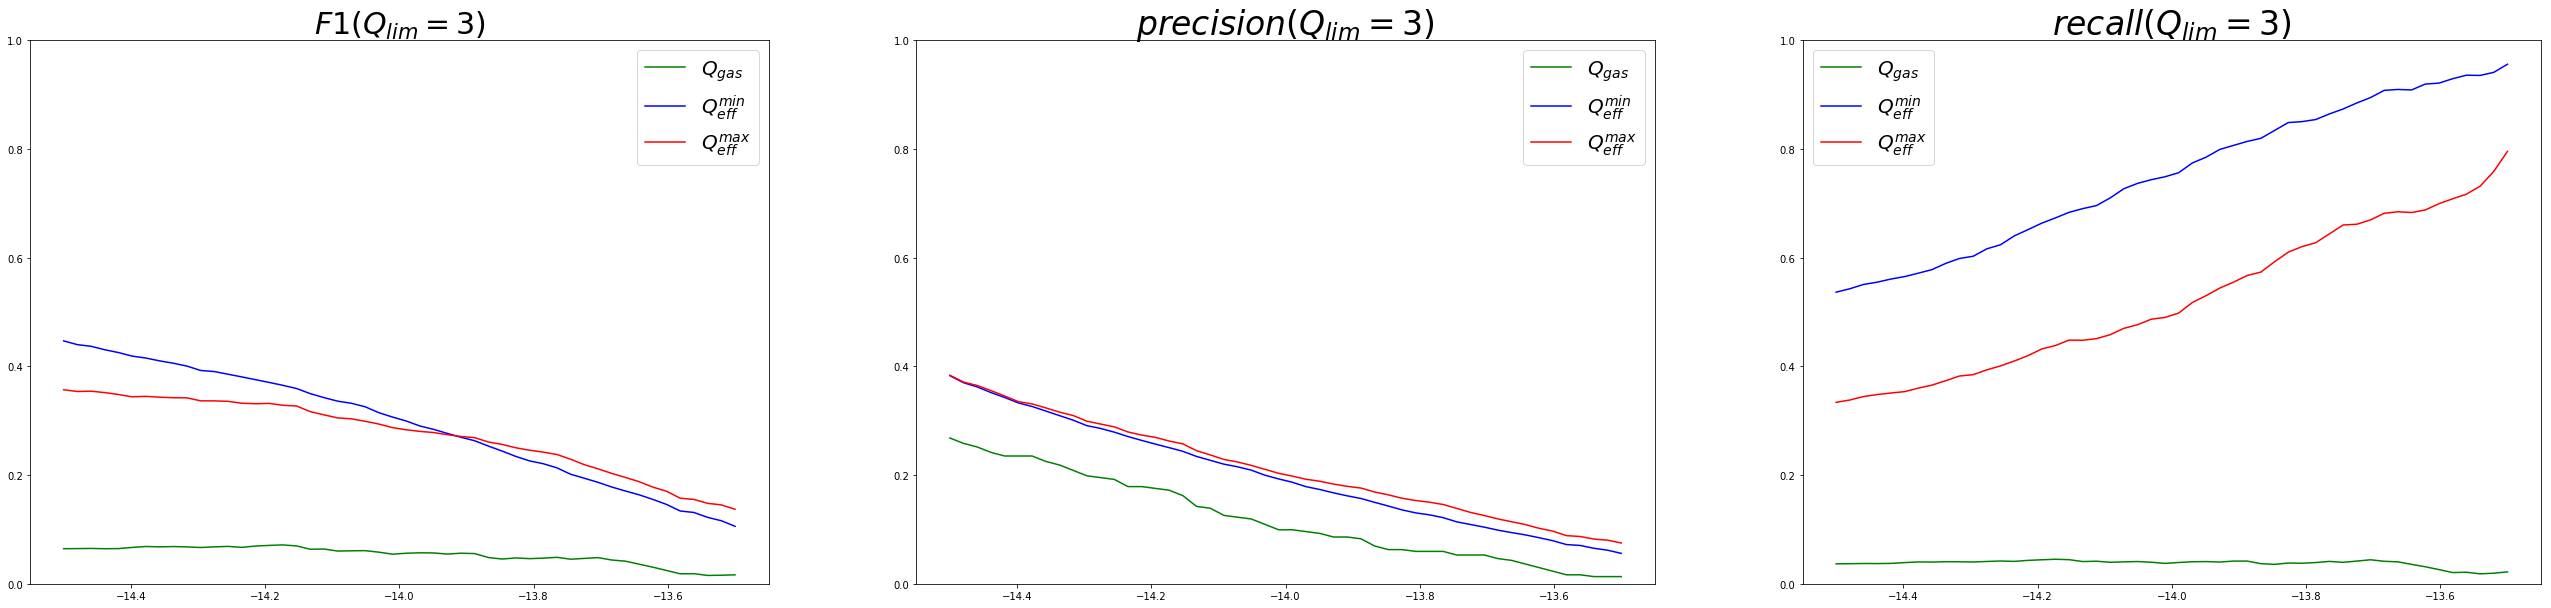

In [15]:
xx =np.array(np.linspace(-14.5, -13.5, 50))
fig = plt.figure(figsize=[45, 10])

plt.subplot(1,3,1)
plt.plot(xx,F1_Qg3,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,F1_Qmin3,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,F1_Qmax3,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.ylim(0.,1.)
plt.title(r'$F1(Q_{lim} = 3)$', fontsize=30)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,2)
plt.plot(xx,precision_Qg3,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,precision_Qmin3,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,precision_Qmax3,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$precision(Q_{lim} = 3)$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,3)
plt.plot(xx,recall_Qg3,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,recall_Qmin3,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,recall_Qmax3,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$recall(Q_{lim} = 3)$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20) 

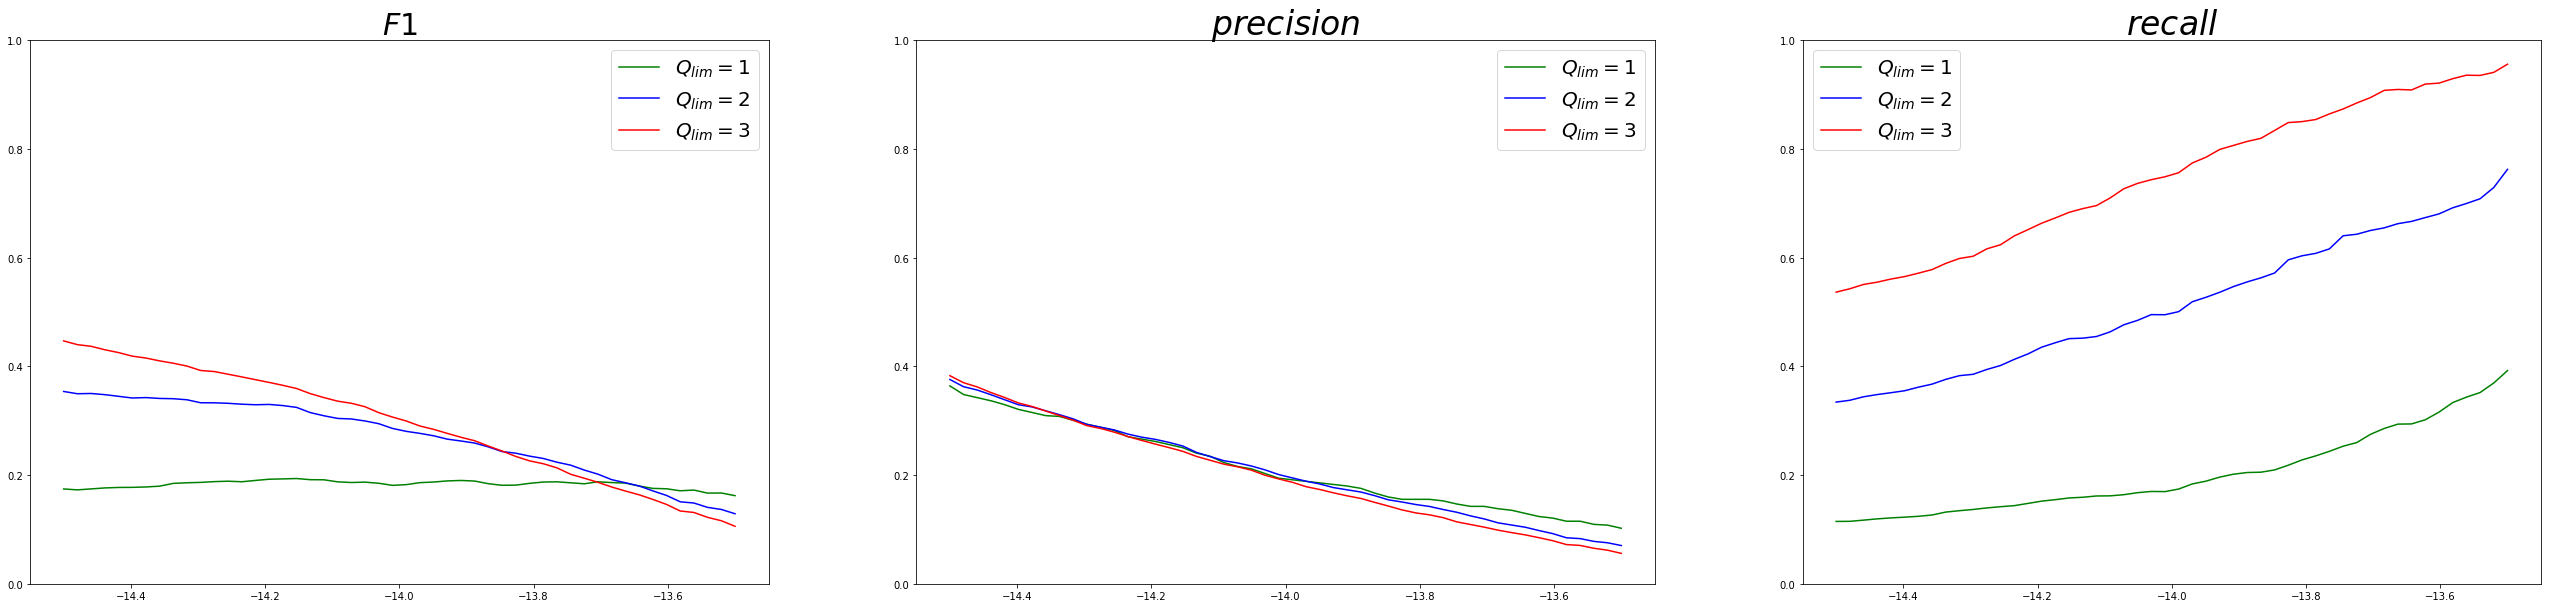

In [16]:
xx =np.array(np.linspace(-14.5, -13.5, 50))
fig = plt.figure(figsize=[45, 10])

plt.subplot(1,3,1)
plt.plot(xx,F1_Qmin1,'-', label=r'$Q_{lim} = 1$', color='green')
plt.plot(xx,F1_Qmin2,'-', label=r'$Q_{lim} = 2$', color='blue')
plt.plot(xx,F1_Qmin3,'-', label=r'$Q_{lim} = 3$', color='red')
plt.title(r'$F1$', fontsize=30)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,2)
plt.plot(xx,precision_Qmin1,'-', label=r'$Q_{lim} = 1$', color='green')
plt.plot(xx,precision_Qmin2,'-', label=r'$Q_{lim} = 2$', color='blue')
plt.plot(xx,precision_Qmin3,'-', label=r'$Q_{lim} = 3$', color='red')
plt.title(r'$precision$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,3)
plt.plot(xx,recall_Qmin1,'-', label=r'$Q_{lim} = 1$', color='green')
plt.plot(xx,recall_Qmin2,'-', label=r'$Q_{lim} = 2$', color='blue')
plt.plot(xx,recall_Qmin3,'-', label=r'$Q_{lim} = 3$', color='red')
plt.title(r'$recall$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)

Теперь, сделаем то же самое, только будем обрезать данные вне 5 кпк. Может ситуация улучшится.

In [17]:
precision_Qg1_cut = []
recall_Qg1_cut = []
F1_Qg1_cut = []
precision_Qmin1_cut = []
recall_Qmin1_cut = []
F1_Qmin1_cut = []
precision_Qmax1_cut = []
recall_Qmax1_cut = []
F1_Qmax1_cut = []

qlim = 1
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 1
        FP = 1
        FN = 1
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                if (dist_kpc[k][l] <= 5): 
                    if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                        TP+=1
                    
                    if (Qg[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                        FN+=1
                
                    if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                        FP+=1
         
        precision_Qg1_cut.append(TP/(TP + FP))
        recall_Qg1_cut.append(TP/(TP + FN))
        F1_Qg1_cut.append(2*precision_Qg1_cut[i] * recall_Qg1_cut[i]/(precision_Qg1_cut[i] + recall_Qg1_cut[i]))
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                if (dist_kpc[k][l] <= 5): 
                    if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                        TP+=1
                    
                    if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                        FN+=1
                 
                    if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                        FP+=1
         
        precision_Qmin1_cut.append(TP/(TP + FP))
        recall_Qmin1_cut.append(TP/(TP + FN))
        F1_Qmin1_cut.append(2*precision_Qmin1_cut[i] * recall_Qmin1_cut[i]/(precision_Qmin1_cut[i] + recall_Qmin1_cut[i])) 
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                if (dist_kpc[k][l] <= 5): 
                    if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                        TP+=1
                      
                    if (Qeff_max[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                        FN+=1
                 
                    if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                        FP+=1
         
        precision_Qmax1_cut.append(TP/(TP + FP))
        recall_Qmax1_cut.append(TP/(TP + FN))
        F1_Qmax1_cut.append(2*precision_Qmax1_cut[i] * recall_Qmax1_cut[i]/(precision_Qmax1_cut[i] + recall_Qmax1_cut[i]))                

In [18]:
precision_Qg2_cut = []
recall_Qg2_cut = []
F1_Qg2_cut = []
precision_Qmin2_cut = []
recall_Qmin2_cut = []
F1_Qmin2_cut = []
precision_Qmax2_cut = []
recall_Qmax2_cut = []
F1_Qmax2_cut = []

qlim = 2
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 1
        FP = 1
        FN = 1
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                if (dist_kpc[k][l] <= 5): 
                    if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                        TP+=1
                    
                    if (Qg[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                        FN+=1
                
                    if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                        FP+=1
         
        precision_Qg2_cut.append(TP/(TP + FP))
        recall_Qg2_cut.append(TP/(TP + FN))
        F1_Qg2_cut.append(2*precision_Qg2_cut[i] * recall_Qg2_cut[i]/(precision_Qg2_cut[i] + recall_Qg2_cut[i]))
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                if (dist_kpc[k][l] <= 5): 
                    if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                        TP+=1
                    
                    if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                        FN+=1
                 
                    if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                        FP+=1
         
        precision_Qmin2_cut.append(TP/(TP + FP))
        recall_Qmin2_cut.append(TP/(TP + FN))
        F1_Qmin2_cut.append(2*precision_Qmin2_cut[i] * recall_Qmin2_cut[i]/(precision_Qmin2_cut[i] + recall_Qmin2_cut[i])) 
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                if (dist_kpc[k][l] <= 5): 
                    if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                        TP+=1
                      
                    if (Qeff_max[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                        FN+=1
                 
                    if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                        FP+=1
         
        precision_Qmax2_cut.append(TP/(TP + FP))
        recall_Qmax2_cut.append(TP/(TP + FN))
        F1_Qmax2_cut.append(2*precision_Qmax2_cut[i] * recall_Qmax2_cut[i]/(precision_Qmax2_cut[i] + recall_Qmax2_cut[i]))                

In [19]:
precision_Qg3_cut = []
recall_Qg3_cut = []
F1_Qg3_cut = []
precision_Qmin3_cut = []
recall_Qmin3_cut = []
F1_Qmin3_cut = []
precision_Qmax3_cut = []
recall_Qmax3_cut = []
F1_Qmax3_cut = []

qlim = 3
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 1
        FP = 1
        FN = 1
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                if (dist_kpc[k][l] <= 5): 
                    if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                        TP+=1
                    
                    if (Qg[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                        FN+=1
                
                    if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                        FP+=1
         
        precision_Qg3_cut.append(TP/(TP + FP))
        recall_Qg3_cut.append(TP/(TP + FN))
        F1_Qg3_cut.append(2*precision_Qg3_cut[i] * recall_Qg3_cut[i]/(precision_Qg3_cut[i] + recall_Qg3_cut[i]))
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                if (dist_kpc[k][l] <= 5): 
                    if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                        TP+=1
                    
                    if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                        FN+=1
                 
                    if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                        FP+=1
         
        precision_Qmin3_cut.append(TP/(TP + FP))
        recall_Qmin3_cut.append(TP/(TP + FN))
        F1_Qmin3_cut.append(2*precision_Qmin3_cut[i] * recall_Qmin3_cut[i]/(precision_Qmin3_cut[i] + recall_Qmin3_cut[i])) 
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                if (dist_kpc[k][l] <= 5): 
                    if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                        TP+=1
                      
                    if (Qeff_max[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                        FN+=1
                 
                    if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                        FP+=1
         
        precision_Qmax3_cut.append(TP/(TP + FP))
        recall_Qmax3_cut.append(TP/(TP + FN))
        F1_Qmax3_cut.append(2*precision_Qmax3_cut[i] * recall_Qmax3_cut[i]/(precision_Qmax3_cut[i] + recall_Qmax3_cut[i]))    

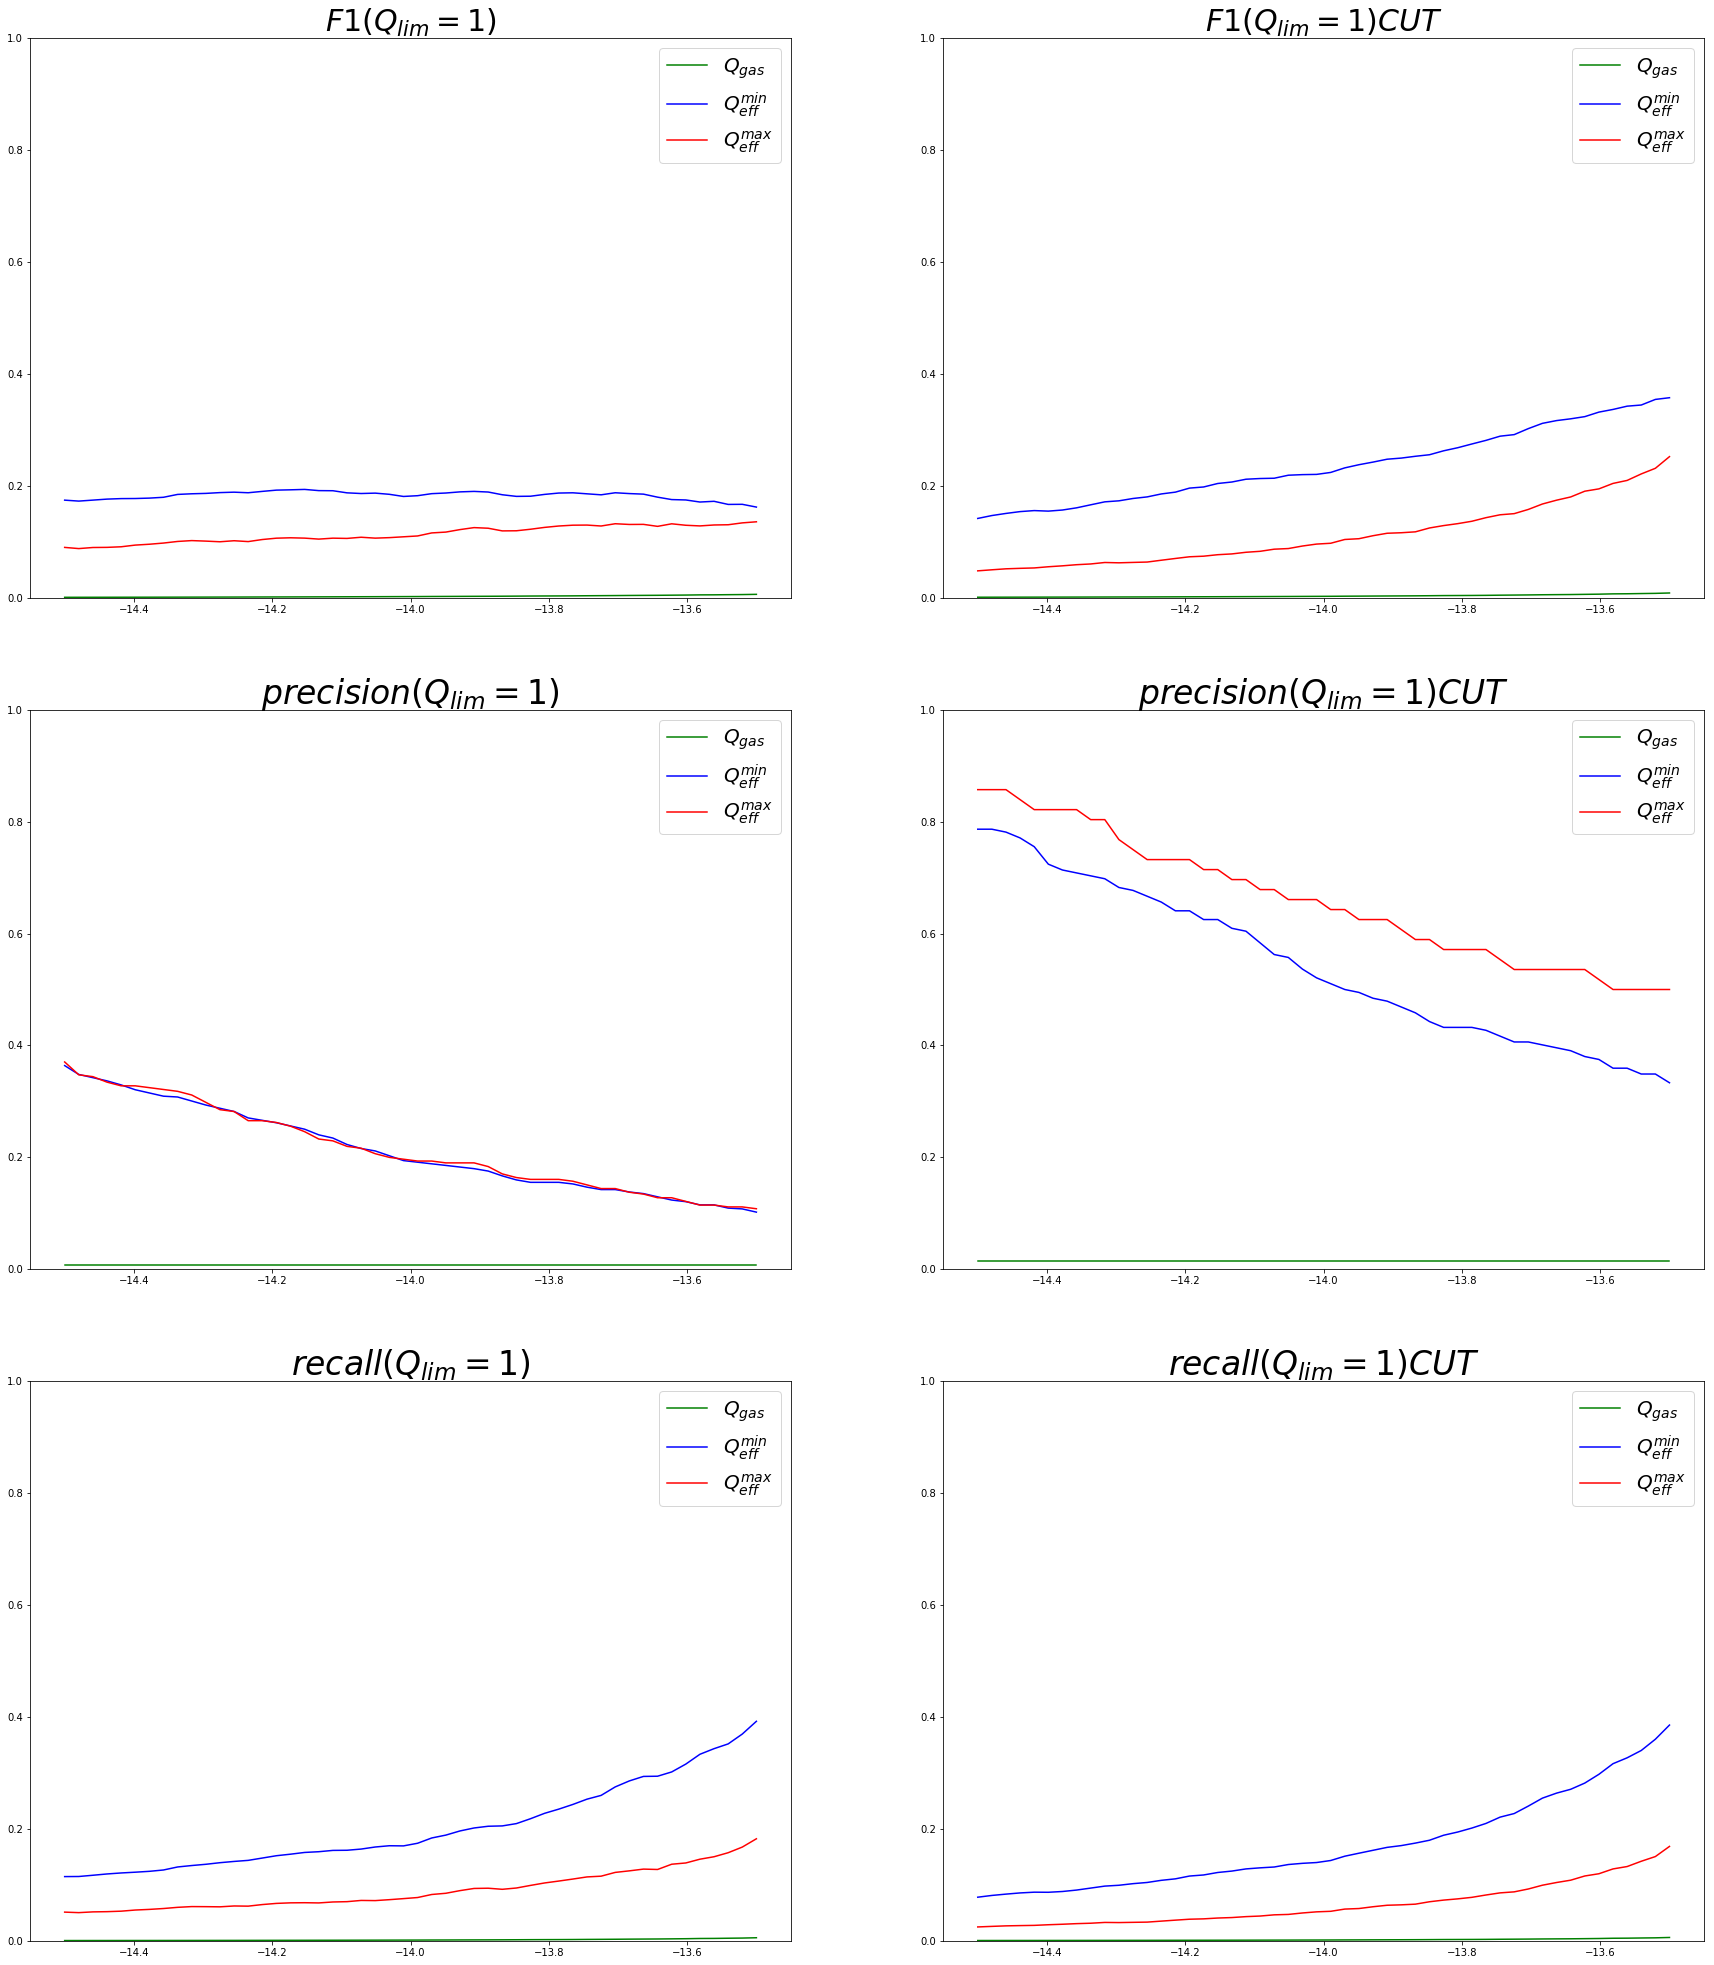

In [20]:
xx =np.array(np.linspace(-14.5, -13.5, 50))
fig = plt.figure(figsize=[30, 35])

plt.subplot(3,2,1)
plt.plot(xx,F1_Qg1,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,F1_Qmin1,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,F1_Qmax1,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$F1(Q_{lim} = 1)$', fontsize=30)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(3,2,3)
plt.plot(xx,precision_Qg1,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,precision_Qmin1,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,precision_Qmax1,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$precision(Q_{lim} = 1)$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(3,2,5)
plt.plot(xx,recall_Qg1,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,recall_Qmin1,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,recall_Qmax1,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$recall(Q_{lim} = 1)$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)

plt.subplot(3,2,2)
plt.plot(xx,F1_Qg1_cut,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,F1_Qmin1_cut,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,F1_Qmax1_cut,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$F1(Q_{lim} = 1)CUT$', fontsize=30)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)

plt.subplot(3,2,4)
plt.plot(xx,precision_Qg1_cut,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,precision_Qmin1_cut,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,precision_Qmax1_cut,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$precision(Q_{lim} = 1)CUT$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(3,2,6)
plt.plot(xx,recall_Qg1_cut,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,recall_Qmin1_cut,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,recall_Qmax1_cut,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$recall(Q_{lim} = 1)CUT$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)

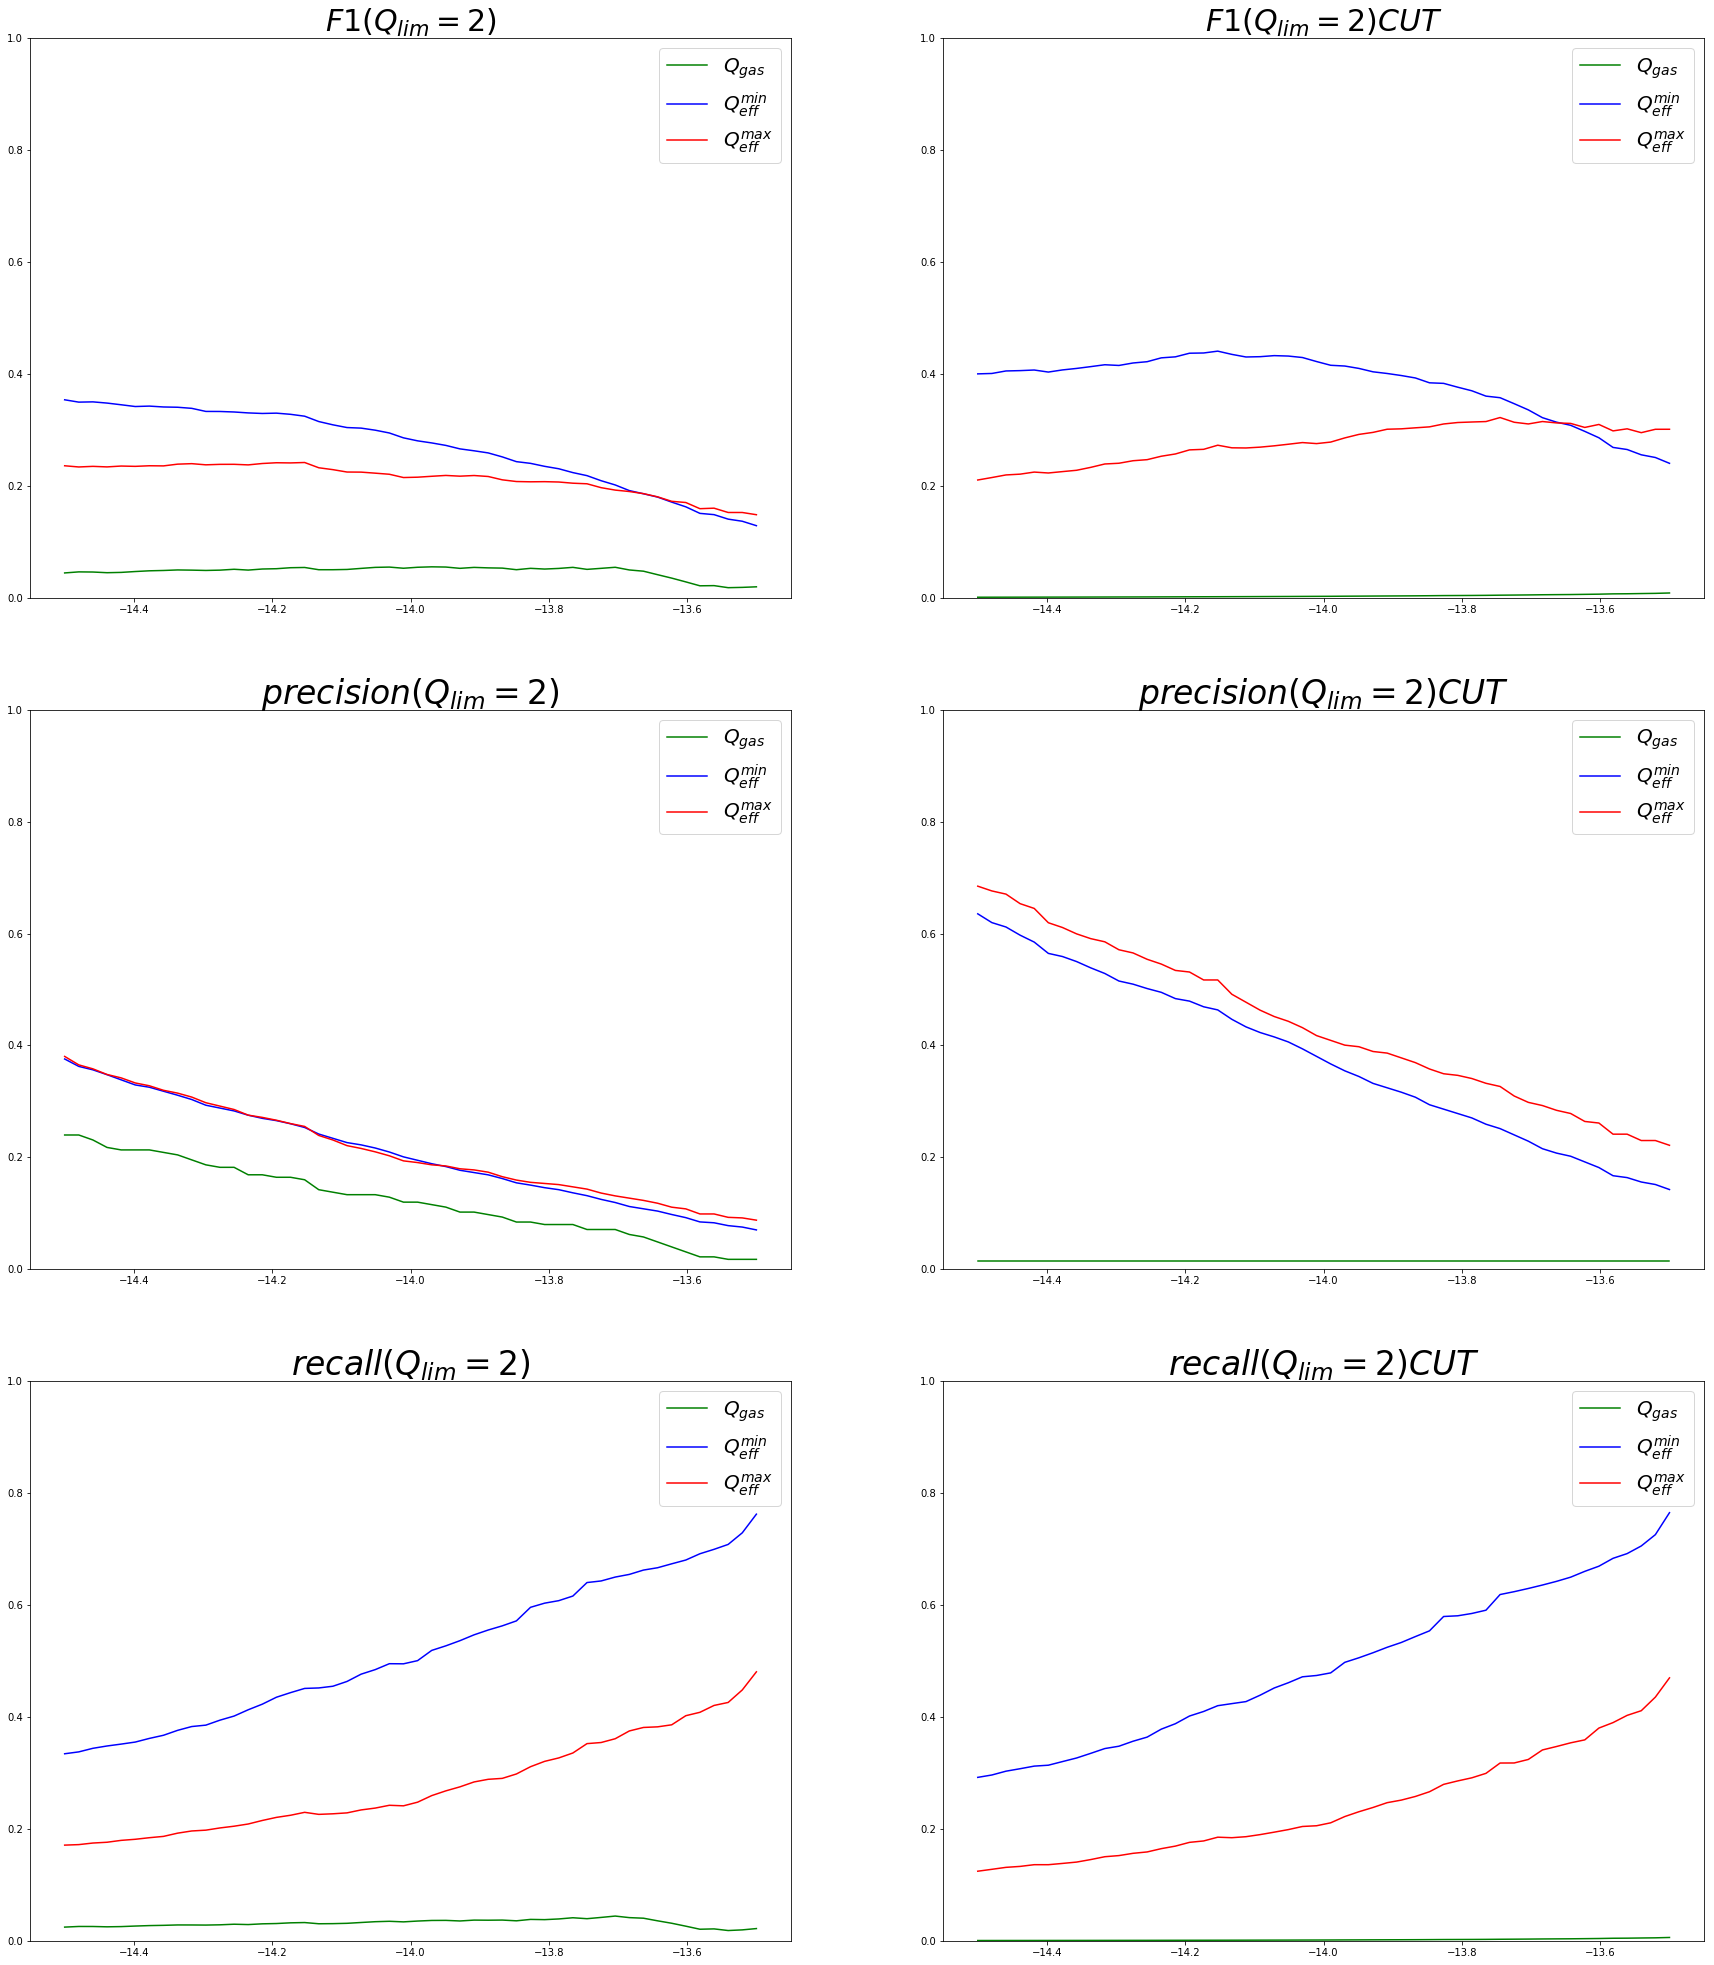

In [21]:
xx =np.array(np.linspace(-14.5, -13.5, 50))
fig = plt.figure(figsize=[30, 35])

plt.subplot(3,2,1)
plt.plot(xx,F1_Qg2,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,F1_Qmin2,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,F1_Qmax2,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$F1(Q_{lim} = 2)$', fontsize=30)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(3,2,3)
plt.plot(xx,precision_Qg2,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,precision_Qmin2,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,precision_Qmax2,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$precision(Q_{lim} = 2)$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(3,2,5)
plt.plot(xx,recall_Qg2,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,recall_Qmin2,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,recall_Qmax2,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$recall(Q_{lim} = 2)$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)

plt.subplot(3,2,2)
plt.plot(xx,F1_Qg2_cut,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,F1_Qmin2_cut,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,F1_Qmax2_cut,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$F1(Q_{lim} = 2)CUT$', fontsize=30)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)

plt.subplot(3,2,4)
plt.plot(xx,precision_Qg2_cut,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,precision_Qmin2_cut,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,precision_Qmax2_cut,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$precision(Q_{lim} = 2)CUT$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(3,2,6)
plt.plot(xx,recall_Qg2_cut,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,recall_Qmin2_cut,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,recall_Qmax2_cut,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$recall(Q_{lim} = 2)CUT$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)

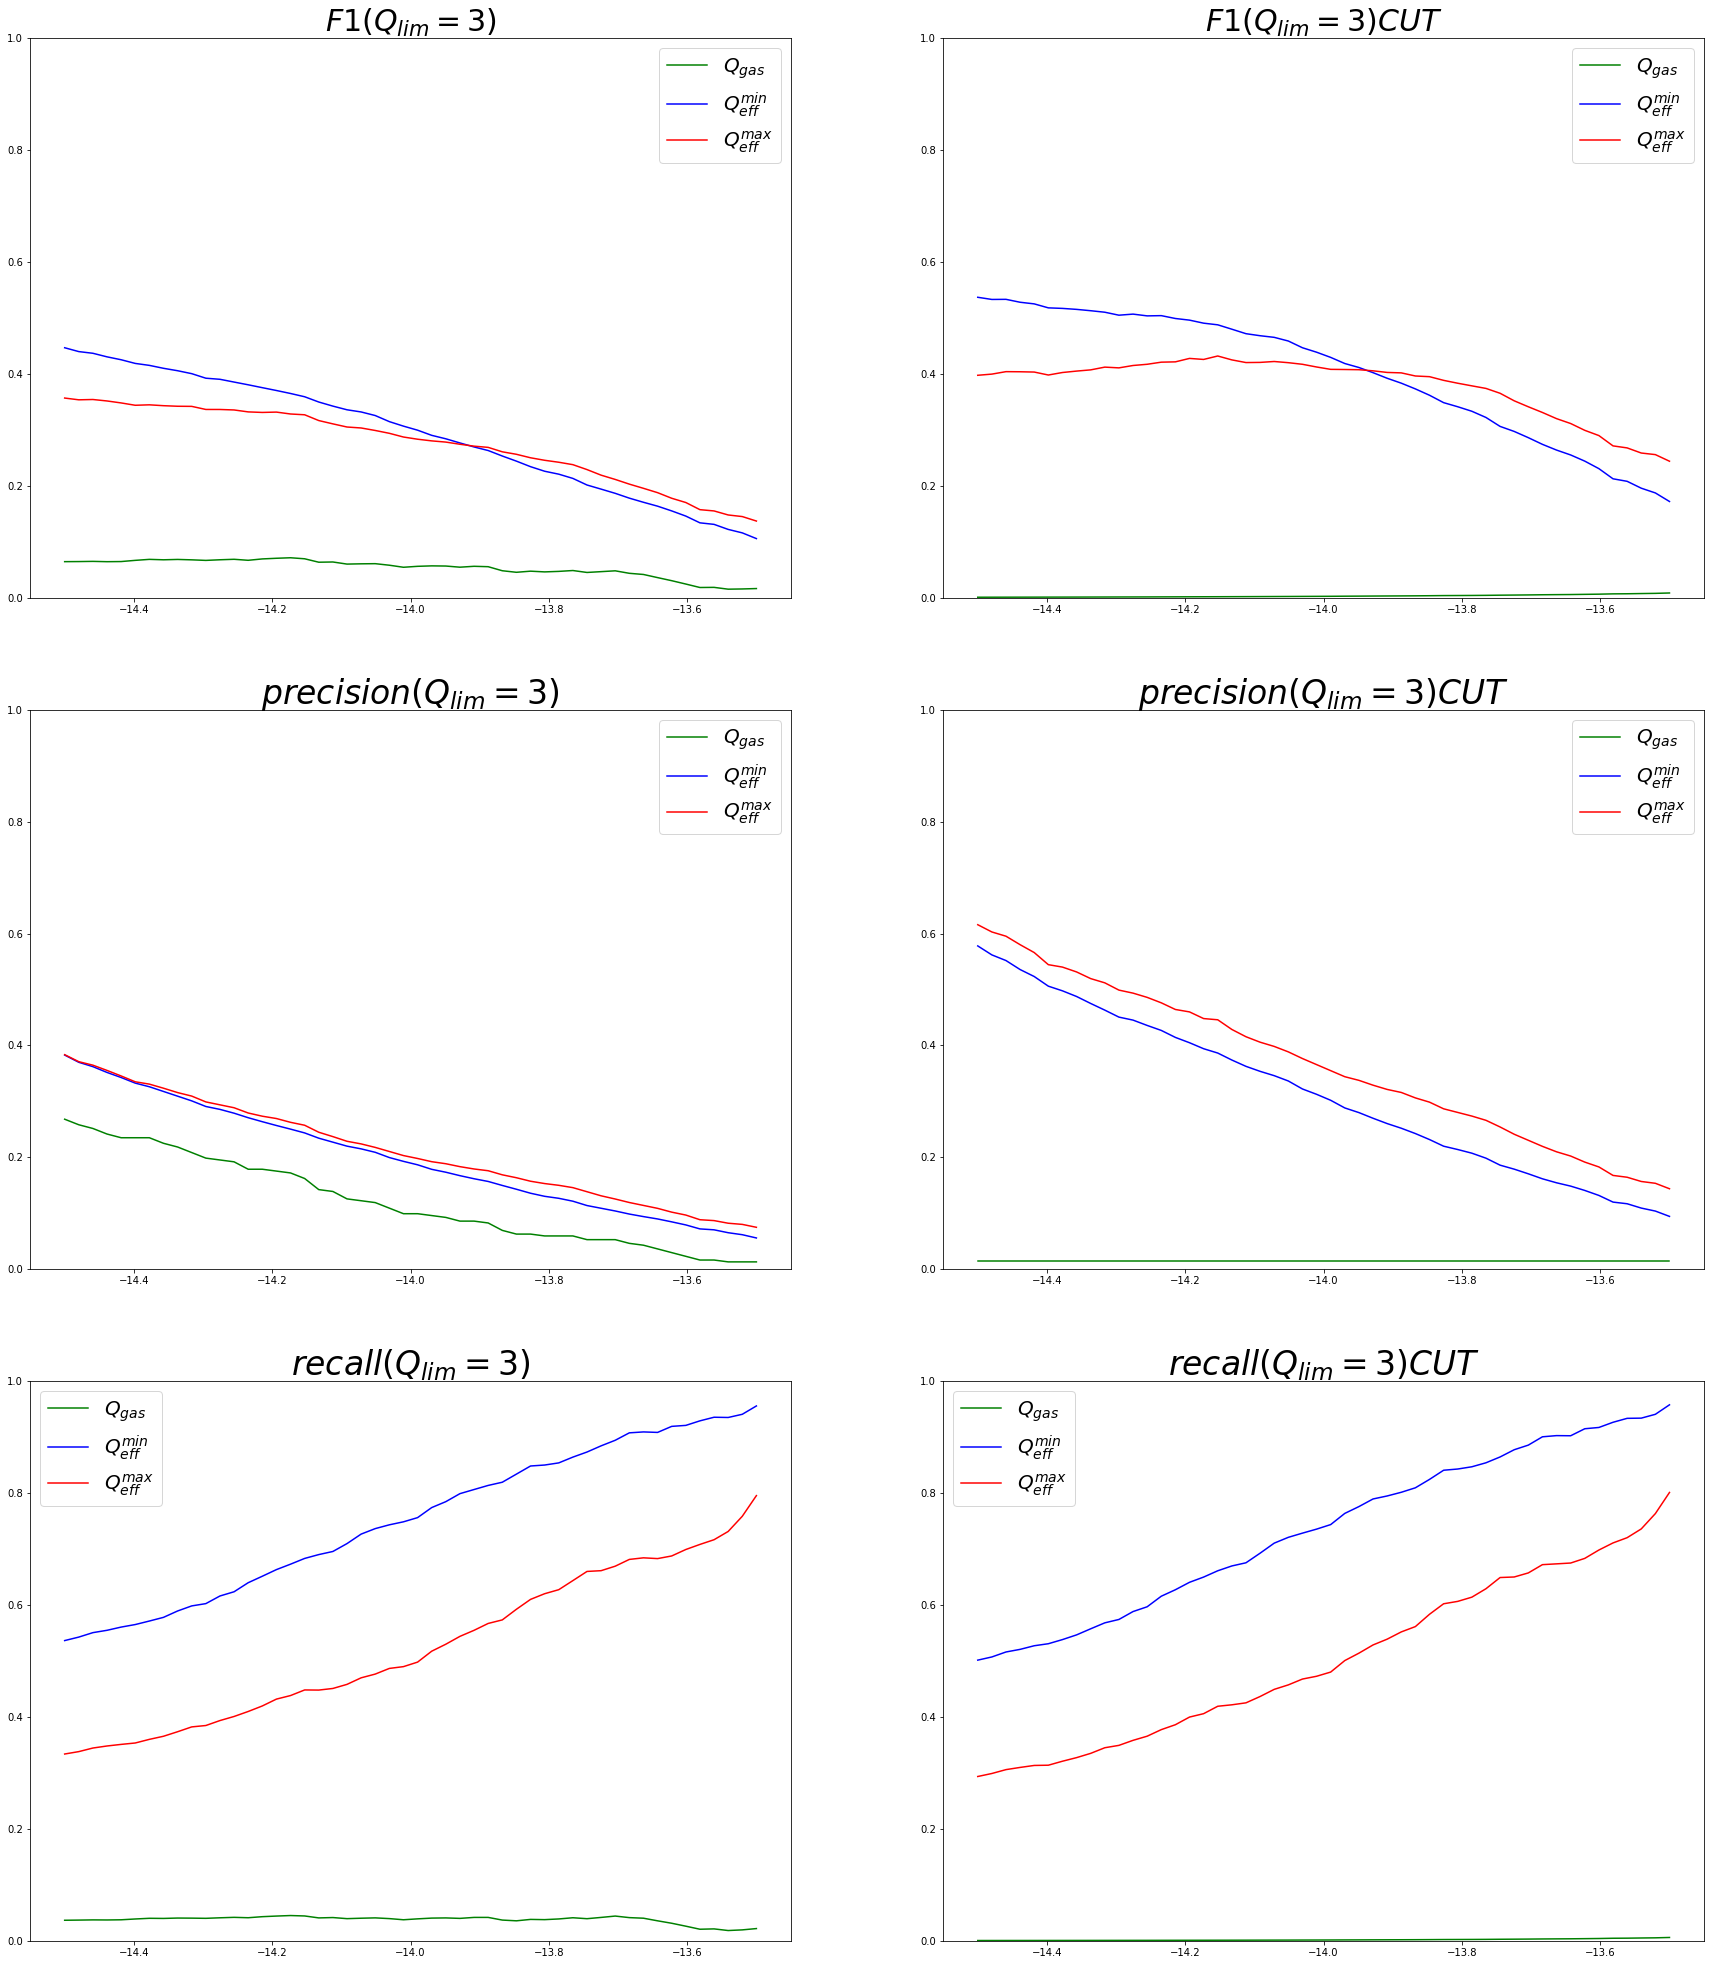

In [22]:
xx =np.array(np.linspace(-14.5, -13.5, 50))
fig = plt.figure(figsize=[30, 35])

plt.subplot(3,2,1)
plt.plot(xx,F1_Qg3,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,F1_Qmin3,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,F1_Qmax3,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$F1(Q_{lim} = 3)$', fontsize=30)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(3,2,3)
plt.plot(xx,precision_Qg3,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,precision_Qmin3,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,precision_Qmax3,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$precision(Q_{lim} = 3)$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(3,2,5)
plt.plot(xx,recall_Qg3,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,recall_Qmin3,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,recall_Qmax3,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$recall(Q_{lim} = 3)$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)

plt.subplot(3,2,2)
plt.plot(xx,F1_Qg3_cut,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,F1_Qmin3_cut,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,F1_Qmax3_cut,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$F1(Q_{lim} = 3)CUT$', fontsize=30)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)

plt.subplot(3,2,4)
plt.plot(xx,precision_Qg3_cut,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,precision_Qmin3_cut,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,precision_Qmax3_cut,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$precision(Q_{lim} = 3)CUT$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(3,2,6)
plt.plot(xx,recall_Qg3_cut,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,recall_Qmin3_cut,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,recall_Qmax3_cut,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$recall(Q_{lim} = 3)CUT$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)

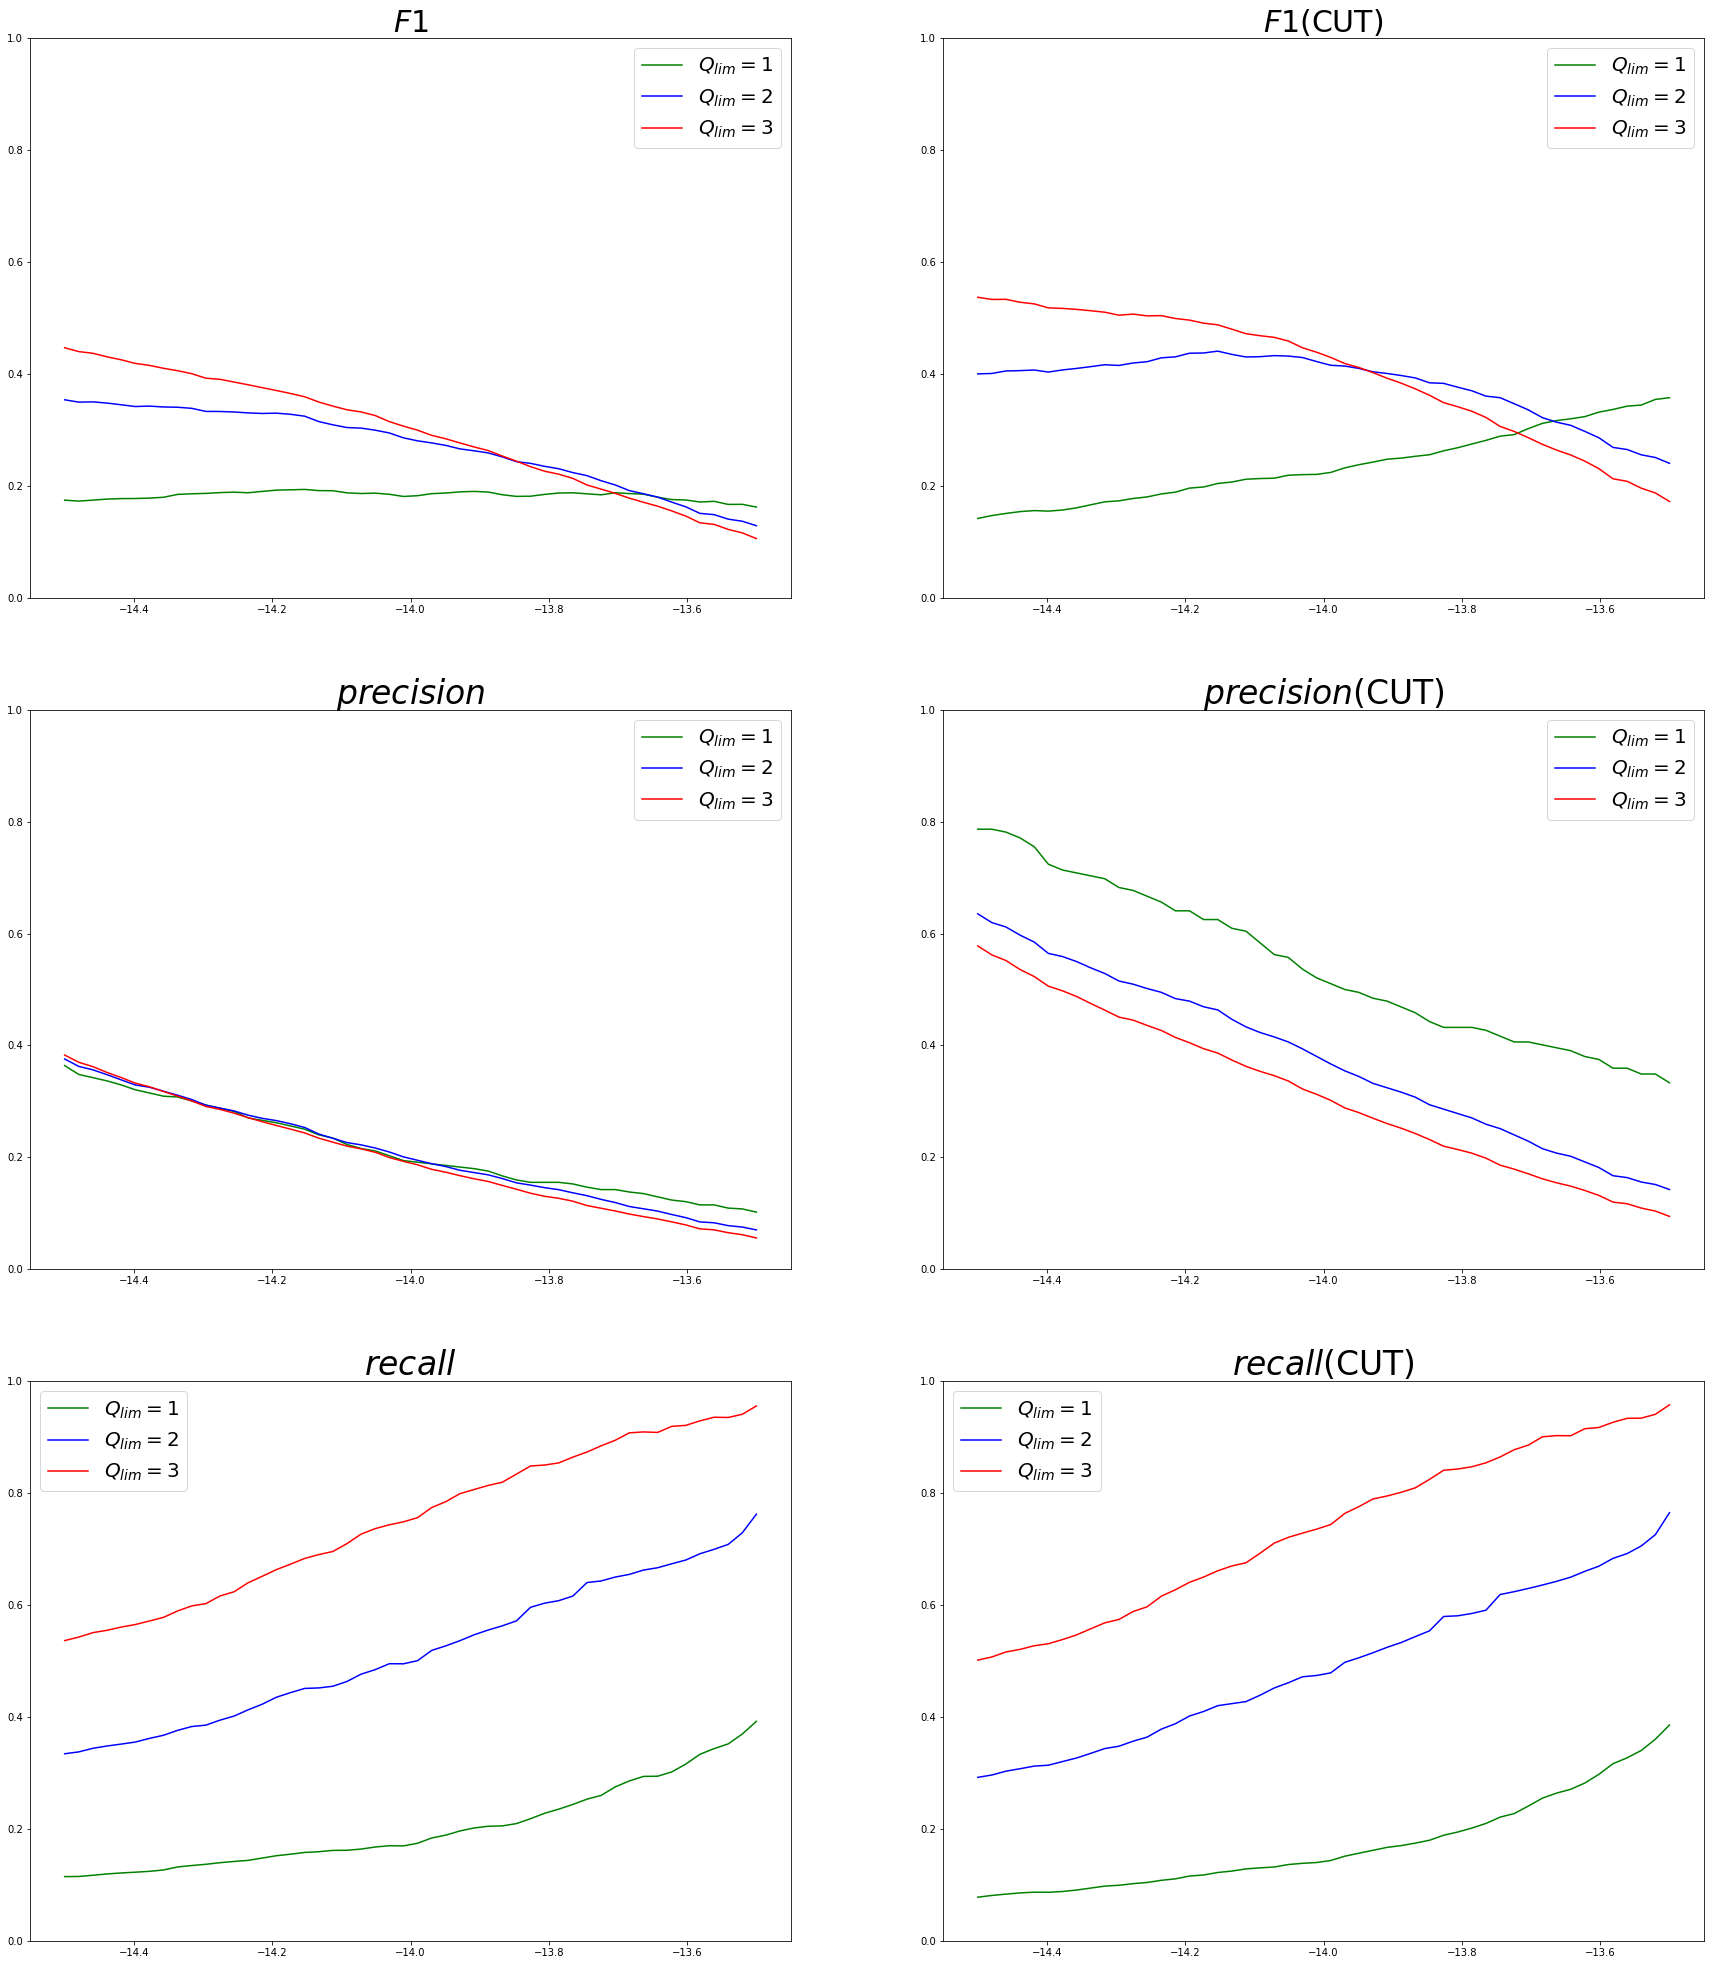

In [23]:
xx =np.array(np.linspace(-14.5, -13.5, 50))
fig = plt.figure(figsize=[30, 35])

plt.subplot(3,2,1)
plt.plot(xx,F1_Qmin1,'-', label=r'$Q_{lim} = 1$', color='green')
plt.plot(xx,F1_Qmin2,'-', label=r'$Q_{lim} = 2$', color='blue')
plt.plot(xx,F1_Qmin3,'-', label=r'$Q_{lim} = 3$', color='red')
plt.title(r'$F1$', fontsize=30)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(3,2,3)
plt.plot(xx,precision_Qmin1,'-', label=r'$Q_{lim} = 1$', color='green')
plt.plot(xx,precision_Qmin2,'-', label=r'$Q_{lim} = 2$', color='blue')
plt.plot(xx,precision_Qmin3,'-', label=r'$Q_{lim} = 3$', color='red')
plt.title(r'$precision$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(3,2,5)
plt.plot(xx,recall_Qmin1,'-', label=r'$Q_{lim} = 1$', color='green')
plt.plot(xx,recall_Qmin2,'-', label=r'$Q_{lim} = 2$', color='blue')
plt.plot(xx,recall_Qmin3,'-', label=r'$Q_{lim} = 3$', color='red')
plt.title(r'$recall$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)

plt.subplot(3,2,2)
plt.plot(xx,F1_Qmin1_cut,'-', label=r'$Q_{lim} = 1$', color='green')
plt.plot(xx,F1_Qmin2_cut,'-', label=r'$Q_{lim} = 2$', color='blue')
plt.plot(xx,F1_Qmin3_cut,'-', label=r'$Q_{lim} = 3$', color='red')
plt.title(r'$F1$(CUT)', fontsize=30)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(3,2,4)
plt.plot(xx,precision_Qmin1_cut,'-', label=r'$Q_{lim} = 1$', color='green')
plt.plot(xx,precision_Qmin2_cut,'-', label=r'$Q_{lim} = 2$', color='blue')
plt.plot(xx,precision_Qmin3_cut,'-', label=r'$Q_{lim} = 3$', color='red')
plt.title(r'$precision$(CUT)', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(3,2,6)
plt.plot(xx,recall_Qmin1_cut,'-', label=r'$Q_{lim} = 1$', color='green')
plt.plot(xx,recall_Qmin2_cut,'-', label=r'$Q_{lim} = 2$', color='blue')
plt.plot(xx,recall_Qmin3_cut,'-', label=r'$Q_{lim} = 3$', color='red')
plt.title(r'$recall$(CUT)', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)

Так же [в этой статье](http://bazhenov.me/blog/2012/07/21/classification-performance-evaluation.html) есть следующая формула, с помощью которой можно привычислении F-меры можно отдать приоритет либо точности, либо полноте $$F1 = (\beta^2 + 1) \frac{precision \cdot recall}{\beta^2 precision + recall}$$
где $\beta$ принимает значения в диапазоне $0 < \beta < 1$ если вы хотите отдать приоритет точности, а при $\beta > 1$ приоритет отдается полноте.

Попробуем поварьировать $\beta^2$

Приоритет отдадим сначала точности.

In [23]:
F1_Qmin_precision = np.zeros((50,50))
beta_square = 1./4.
for i, qlim in enumerate(np.linspace(0.5, 5., 50)):
    for j, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        precision_Qmin = 0
        recall_Qmin = 0
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1 
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmin = TP/(TP + FP)
        recall_Qmin = TP/(TP + FN)
        F1_Qmin_precision[i][j] = (beta_square+1)*precision_Qmin * recall_Qmin/(beta_square*precision_Qmin + recall_Qmin)

In [24]:
F1_Qmax_precision = np.zeros((50,50))
beta_square = 1./4.

for i, qlim in enumerate(np.linspace(0.5, 5., 50)):
    for j, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        precision_Qmax = 0
        recall_Qmax = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_max[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmax = TP/(TP + FP)
        recall_Qmax = TP/(TP + FN)
        F1_Qmax_precision[i][j] = (beta_square+1)*precision_Qmax * recall_Qmax/(beta_square*precision_Qmax + recall_Qmax)

In [25]:
F1_Qg_precision = np.zeros((50,50))
beta_square = 1./4.

for i, qlim in enumerate(np.linspace(0.5, 5., 50)):
    for j, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        precision_Qg = 0
        recall_Qg = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_max[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qg = TP/(TP + FP)
        recall_Qg = TP/(TP + FN)
        F1_Qg_precision[i][j] = (beta_square+1)*precision_Qg * recall_Qg/(beta_square*precision_Qg + recall_Qg)

Теперь отдадим приоритет полноте.

In [18]:
F1_Qmin_recall = np.zeros((50,50))
beta_square = 2.
for i, qlim in enumerate(np.linspace(0.5, 5., 50)):
    for j, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        precision_Qmin = 0
        recall_Qmin = 0
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1 
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmin = TP/(TP + FP)
        recall_Qmin = TP/(TP + FN)
        F1_Qmin_recall[i][j] = (beta_square+1)*precision_Qmin * recall_Qmin/(beta_square*precision_Qmin + recall_Qmin)

In [21]:
F1_Qmax_recall = np.zeros((50,50))
beta_square = 2.

for i, qlim in enumerate(np.linspace(0.5, 5., 50)):
    for j, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        precision_Qmax = 0
        recall_Qmax = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_max[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmax = TP/(TP + FP)
        recall_Qmax = TP/(TP + FN)
        F1_Qmax_recall[i][j] = (beta_square+1)*precision_Qmax * recall_Qmax/(beta_square*precision_Qmax + recall_Qmax)

In [19]:
F1_Qg_recall = np.zeros((50,50))
beta_square = 2.

for i, qlim in enumerate(np.linspace(0.5, 5., 50)):
    for j, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        precision_Qg = 0
        recall_Qg = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_max[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qg = TP/(TP + FP)
        recall_Qg = TP/(TP + FN)
        F1_Qg_recall[i][j] = (beta_square+1)*precision_Qg * recall_Qg/(beta_square*precision_Qg + recall_Qg)

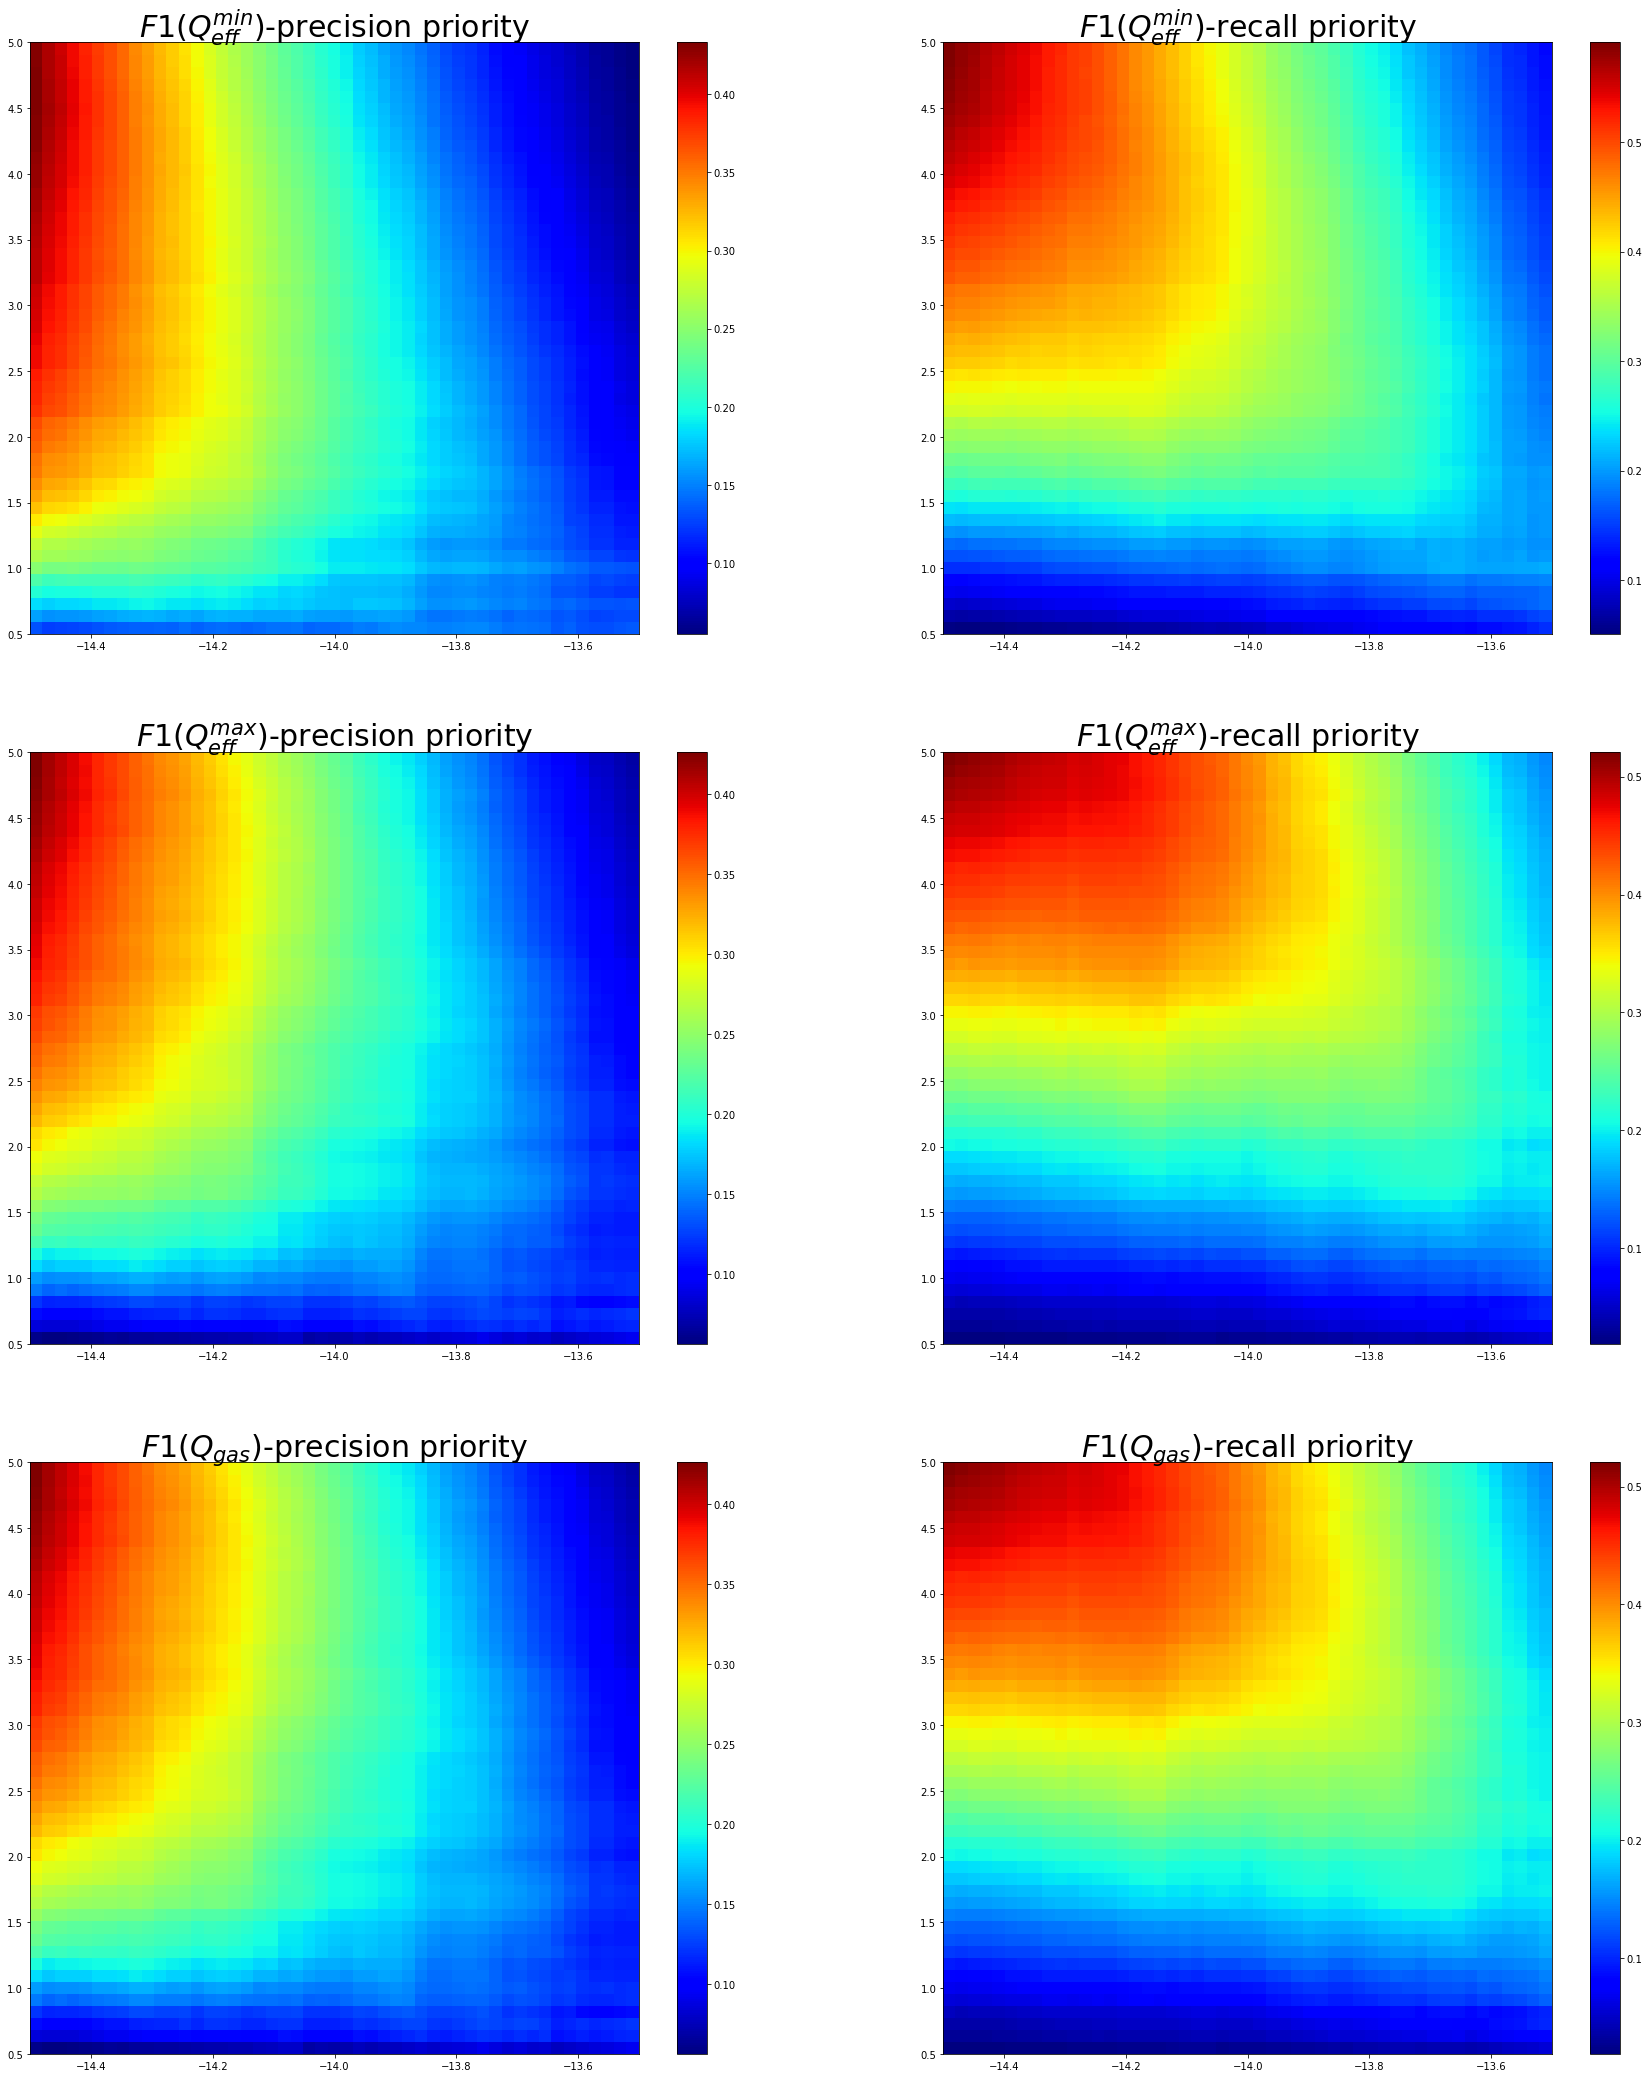

In [26]:
xx =np.array(np.linspace(-14.5, -13.5, 50))
fig = plt.figure(figsize=[30, 37])

plt.subplot(3,2,1)
quadmesh = plt.pcolormesh(xx, yy, F1_Qmin_precision, cmap='jet')
plt.title(r'$F1(Q_{eff}^{min})$-precision priority', fontsize=30)
plt.colorbar()
          
plt.subplot(3,2,3)
quadmesh = plt.pcolormesh(xx, yy, F1_Qmax_precision, cmap='jet')
plt.title(r'$F1(Q_{eff}^{max})$-precision priority', fontsize=30)
plt.colorbar()
          
plt.subplot(3,2,5)
quadmesh = plt.pcolormesh(xx, yy, F1_Qg_precision, cmap='jet')
plt.title(r'$F1(Q_{gas})$-precision priority', fontsize=30)
plt.colorbar()

plt.subplot(3,2,2)
quadmesh = plt.pcolormesh(xx, yy, F1_Qmin_recall, cmap='jet')
plt.title(r'$F1(Q_{eff}^{min})$-recall priority', fontsize=30)
plt.colorbar()

plt.subplot(3,2,4)
quadmesh = plt.pcolormesh(xx, yy, F1_Qmax_recall, cmap='jet')
plt.title(r'$F1(Q_{eff}^{max})$-recall priority', fontsize=30)
plt.colorbar()
          
plt.subplot(3,2,6)
quadmesh = plt.pcolormesh(xx, yy, F1_Qg_recall, cmap='jet')
plt.title(r'$F1(Q_{gas})$-recall priority', fontsize=30)
plt.colorbar()


Теперь сделаем те же самые срезы, только теперь в приоритете будет у нас либо точность , либо полнота

Начнём с точности

In [3]:
F1_Qg1_precision = []
F1_Qmin1_precision = []
F1_Qmax1_precision = []
beta_square = 1./4.
qlim = 1.
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 1
        FP = 1
        FN = 1
        precision_Qg1 = 0
        recall_Qg1 = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qg[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qg1 = (TP/(TP + FP))
        recall_Qg1 = (TP/(TP + FN))
        F1_Qg1_precision.append((beta_square+1)*precision_Qg1 * recall_Qg1/(beta_square*precision_Qg1 + recall_Qg1))
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        precision_Qmin1 = 0
        recall_Qmin1 = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmin1 = (TP/(TP + FP))
        recall_Qmin1 = (TP/(TP + FN))
        F1_Qmin1_precision.append((beta_square+1)*precision_Qmin1 * recall_Qmin1/(beta_square*precision_Qmin1 + recall_Qmin1)) 
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        precision_Qmax1 = 0
        recall_Qmax1 = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_max[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmax1 = (TP/(TP + FP))
        recall_Qmax1 = (TP/(TP + FN))
        F1_Qmax1_precision.append((beta_square+1)*precision_Qmax1 * recall_Qmax1/(beta_square*precision_Qmax1 + recall_Qmax1))                

In [4]:
F1_Qg2_precision = []
F1_Qmin2_precision = []
F1_Qmax2_precision = []
beta_square = 1./4.
qlim = 2.
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 1
        FP = 1
        FN = 1
        precision_Qg2 = 0
        recall_Qg2 = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qg[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qg2 = (TP/(TP + FP))
        recall_Qg2 = (TP/(TP + FN))
        F1_Qg2_precision.append((beta_square+1)*precision_Qg2 * recall_Qg2/(beta_square*precision_Qg2 + recall_Qg2))
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        precision_Qmin2 = 0
        recall_Qmin2 = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmin2 = (TP/(TP + FP))
        recall_Qmin2 = (TP/(TP + FN))
        F1_Qmin2_precision.append((beta_square+1)*precision_Qmin2 * recall_Qmin2/(beta_square*precision_Qmin2 + recall_Qmin2)) 
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        precision_Qmax2 = 0
        recall_Qmax2 = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_max[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmax2 = (TP/(TP + FP))
        recall_Qmax2 = (TP/(TP + FN))
        F1_Qmax2_precision.append((beta_square+1)*precision_Qmax2 * recall_Qmax2/(beta_square*precision_Qmax2 + recall_Qmax2))                

In [5]:
F1_Qg3_precision = []
F1_Qmin3_precision = []
F1_Qmax3_precision = []
beta_square = 1./4.
qlim = 3.
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 1
        FP = 1
        FN = 1
        precision_Qg3 = 0
        recall_Qg3 = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qg[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qg3 = (TP/(TP + FP))
        recall_Qg3 = (TP/(TP + FN))
        F1_Qg3_precision.append((beta_square+1)*precision_Qg3 * recall_Qg3/(beta_square*precision_Qg3 + recall_Qg3))
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        precision_Qmin3 = 0
        recall_Qmin3 = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmin3 = (TP/(TP + FP))
        recall_Qmin3 = (TP/(TP + FN))
        F1_Qmin3_precision.append((beta_square+1)*precision_Qmin3 * recall_Qmin3/(beta_square*precision_Qmin3 + recall_Qmin3)) 
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        precision_Qmax3 = 0
        recall_Qmax3 = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_max[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmax3 = (TP/(TP + FP))
        recall_Qmax3 = (TP/(TP + FN))
        F1_Qmax3_precision.append((beta_square+1)*precision_Qmax3 * recall_Qmax3/(beta_square*precision_Qmax3 + recall_Qmax3))                

Теперь отдадим приоритет полноте

In [6]:
F1_Qg1_recall = []
F1_Qmin1_recall = []
F1_Qmax1_recall = []
beta_square = 2.
qlim = 1.
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 1
        FP = 1
        FN = 1
        precision_Qg1 = 0
        recall_Qg1 = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qg[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qg1 = (TP/(TP + FP))
        recall_Qg1 = (TP/(TP + FN))
        F1_Qg1_recall.append((beta_square+1)*precision_Qg1 * recall_Qg1/(beta_square*precision_Qg1 + recall_Qg1))
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        precision_Qmin1 = 0
        recall_Qmin1 = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmin1 = (TP/(TP + FP))
        recall_Qmin1 = (TP/(TP + FN))
        F1_Qmin1_recall.append((beta_square+1)*precision_Qmin1 * recall_Qmin1/(beta_square*precision_Qmin1 + recall_Qmin1)) 
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        precision_Qmax1 = 0
        recall_Qmax1 = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_max[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmax1 = (TP/(TP + FP))
        recall_Qmax1 = (TP/(TP + FN))
        F1_Qmax1_recall.append((beta_square+1)*precision_Qmax1 * recall_Qmax1/(beta_square*precision_Qmax1 + recall_Qmax1))                

In [7]:
F1_Qg2_recall = []
F1_Qmin2_recall = []
F1_Qmax2_recall = []
beta_square = 2.
qlim = 2.
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 1
        FP = 1
        FN = 1
        precision_Qg2 = 0
        recall_Qg2 = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qg[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qg2 = (TP/(TP + FP))
        recall_Qg2 = (TP/(TP + FN))
        F1_Qg2_recall.append((beta_square+1)*precision_Qg2 * recall_Qg2/(beta_square*precision_Qg2 + recall_Qg2))
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        precision_Qmin2 = 0
        recall_Qmin2 = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmin2 = (TP/(TP + FP))
        recall_Qmin2 = (TP/(TP + FN))
        F1_Qmin2_recall.append((beta_square+1)*precision_Qmin2 * recall_Qmin2/(beta_square*precision_Qmin2 + recall_Qmin2)) 
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        precision_Qmax2 = 0
        recall_Qmax2 = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_max[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmax2 = (TP/(TP + FP))
        recall_Qmax2 = (TP/(TP + FN))
        F1_Qmax2_recall.append((beta_square+1)*precision_Qmax2 * recall_Qmax2/(beta_square*precision_Qmax2 + recall_Qmax2))                

In [8]:
F1_Qg3_recall = []
F1_Qmin3_recall = []
F1_Qmax3_recall = []
beta_square = 2.
qlim = 3.
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 1
        FP = 1
        FN = 1
        precision_Qg3 = 0
        recall_Qg3 = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qg[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qg[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qg3 = (TP/(TP + FP))
        recall_Qg3 = (TP/(TP + FN))
        F1_Qg3_recall.append((beta_square+1)*precision_Qg3 * recall_Qg3/(beta_square*precision_Qg3 + recall_Qg3))
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        precision_Qmin3 = 0
        recall_Qmin3 = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_min[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmin3 = (TP/(TP + FP))
        recall_Qmin3 = (TP/(TP + FN))
        F1_Qmin3_recall.append((beta_square+1)*precision_Qmin3 * recall_Qmin3/(beta_square*precision_Qmin3 + recall_Qmin3)) 
        
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        precision_Qmax3 = 0
        recall_Qmax3 = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_max[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision_Qmax3 = (TP/(TP + FP))
        recall_Qmax3 = (TP/(TP + FN))
        F1_Qmax3_recall.append((beta_square+1)*precision_Qmax3 * recall_Qmax3/(beta_square*precision_Qmax3 + recall_Qmax3))                

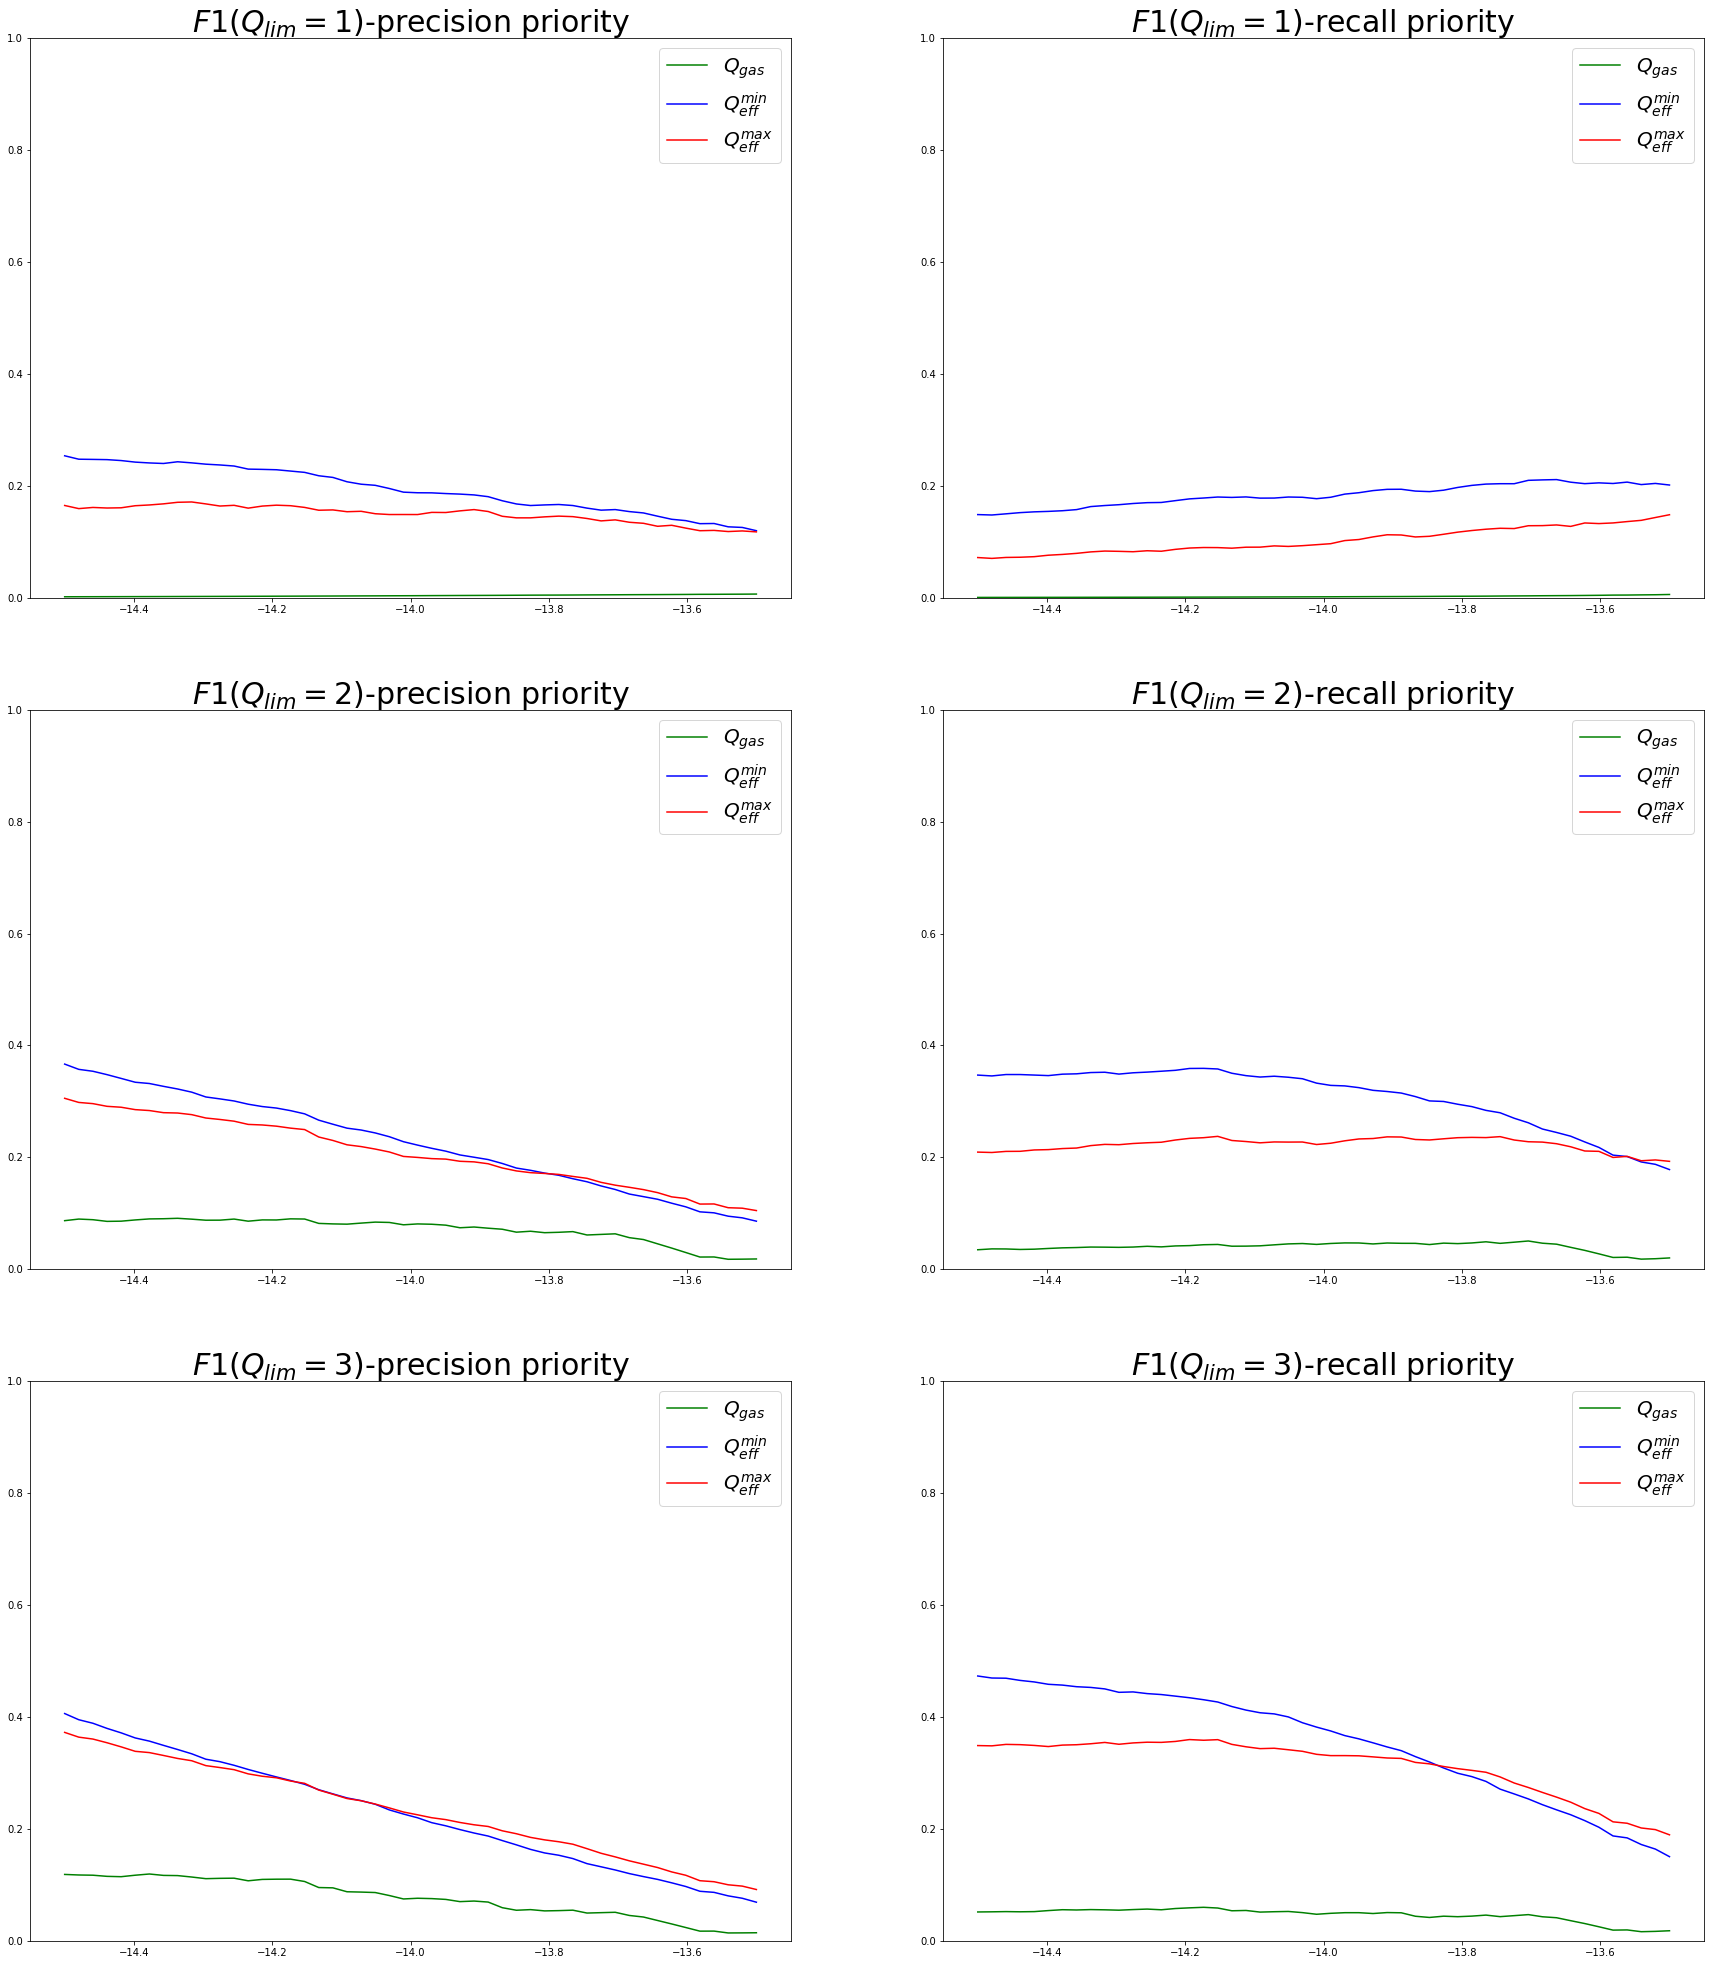

In [9]:
xx =np.array(np.linspace(-14.5, -13.5, 50))
fig = plt.figure(figsize=[30, 35])

plt.subplot(3,2,1)
plt.plot(xx,F1_Qg1_precision,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,F1_Qmin1_precision,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,F1_Qmax1_precision,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$F1(Q_{lim} = 1)$-precision priority', fontsize=30)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(3,2,3)
plt.plot(xx,F1_Qg2_precision,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,F1_Qmin2_precision,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,F1_Qmax2_precision,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$F1(Q_{lim} = 2)$-precision priority', fontsize=30)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(3,2,5)
plt.plot(xx,F1_Qg3_precision,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,F1_Qmin3_precision,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,F1_Qmax3_precision,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$F1(Q_{lim} = 3)$-precision priority', fontsize=30)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)

plt.subplot(3,2,2)
plt.plot(xx,F1_Qg1_recall,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,F1_Qmin1_recall,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,F1_Qmax1_recall,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$F1(Q_{lim} = 1)$-recall priority', fontsize=30)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)

plt.subplot(3,2,4)
plt.plot(xx,F1_Qg2_recall,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,F1_Qmin2_recall,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,F1_Qmax2_recall,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$F1(Q_{lim} = 2)$-recall priority', fontsize=30)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(3,2,6)
plt.plot(xx,F1_Qg3_recall,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,F1_Qmin3_recall,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,F1_Qmax3_recall,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.title(r'$F1(Q_{lim} = 3)$-recall priority', fontsize=30)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)

Построим графики все послучавшие у нас графики при $Q_{lim} = 3$

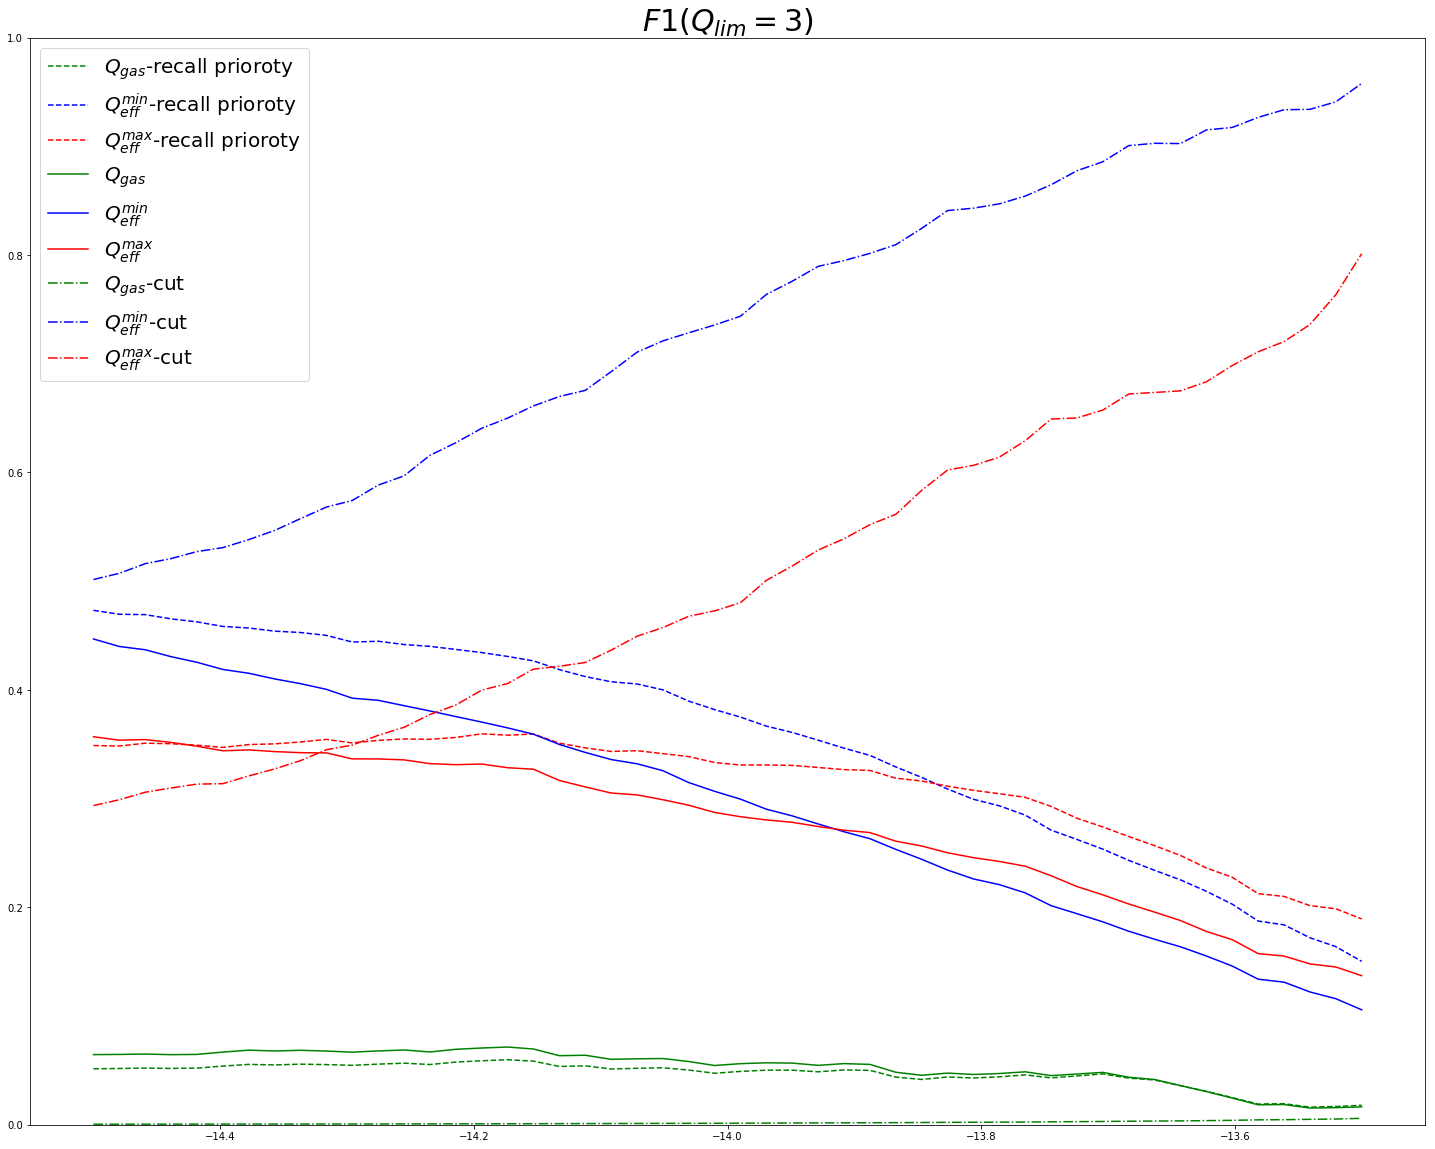

In [26]:
xx =np.array(np.linspace(-14.5, -13.5, 50))
fig = plt.figure(figsize=[25, 20])
plt.plot(xx,F1_Qg3_recall,'--', label=r'$Q_{gas}$-recall prioroty', color='green')
plt.plot(xx,F1_Qmin3_recall,'--', label=r'$Q_{eff}^{min}$-recall prioroty', color='blue')
plt.plot(xx,F1_Qmax3_recall,'--', label=r'$Q_{eff}^{max}$-recall prioroty', color='red')
plt.plot(xx,F1_Qg3,'-', label=r'$Q_{gas}$', color='green')
plt.plot(xx,F1_Qmin3,'-', label=r'$Q_{eff}^{min}$', color='blue')
plt.plot(xx,F1_Qmax3,'-', label=r'$Q_{eff}^{max}$', color='red')
plt.plot(xx,recall_Qg3_cut,'-.', label=r'$Q_{gas}$-сut', color='green')
plt.plot(xx,recall_Qmin3_cut,'-.', label=r'$Q_{eff}^{min}$-cut', color='blue')
plt.plot(xx,recall_Qmax3_cut,'-.', label=r'$Q_{eff}^{max}$-cut', color='red')
plt.title(r'$F1(Q_{lim} = 3)$', fontsize=30)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)

/home/lera/.local/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)


Text(0.5, 1.0, '$Q_{eff}^{max}$')

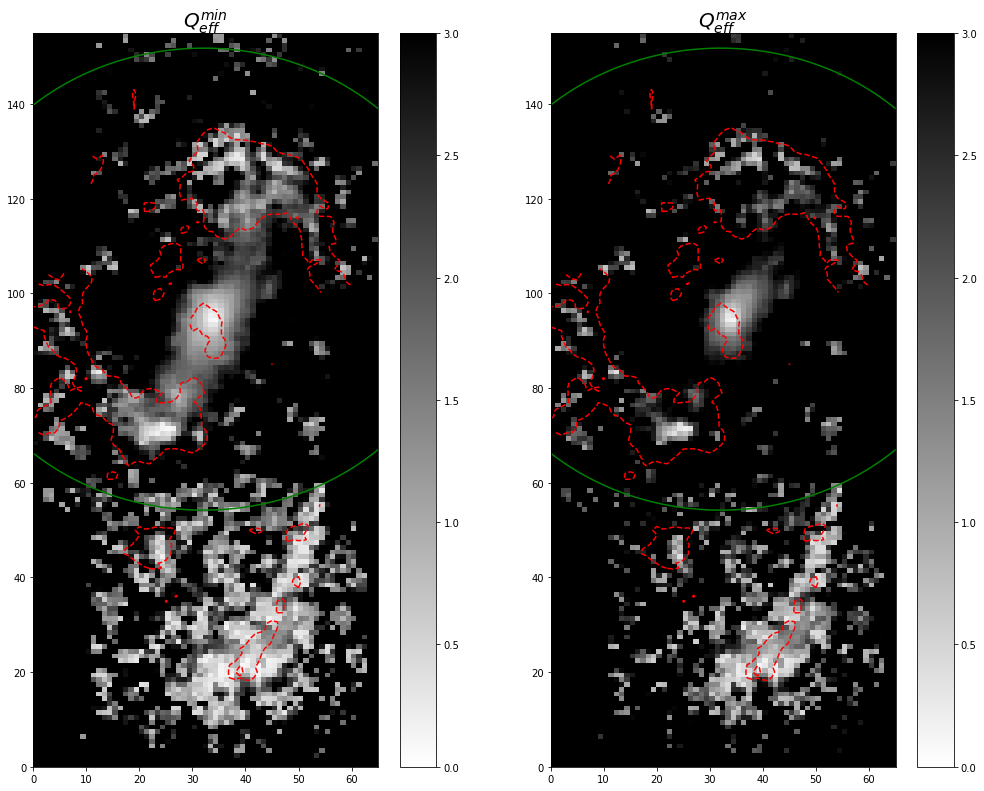

In [27]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, dist_kpc, levels=[0,5], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=0., vmax=3.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, dist_kpc, levels=[0,5], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=0., vmax=3.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

$Q_{eff}^{min}$ и $Q_{eff}^{max}$ это минимальная и максимальная оценки нашего искомого параметра, поэтому можно соотвествующие статистические величины посчитать следующим образом: будем считать, что область неустойчива(сигнал есть), если  $Q_{eff}^{max} < Q_{lim}$ и она стабильна (сигнала нет) , если $Q_{eff}^{min} > Q_{lim}$

In [35]:
precision=np.zeros((50,50))
recall = np.zeros((50,50))
F1 = np.zeros((50,50))

for i, qlim in enumerate(np.linspace(0.5, 5., 50)):
    for j, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1 
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision[i][j] = TP/(TP + FP)
        recall[i][j] = TP/(TP + FN)
        F1[i][j] = 2*precision[i][j] * recall[i][j]/(precision[i][j] + recall[i][j])
                    

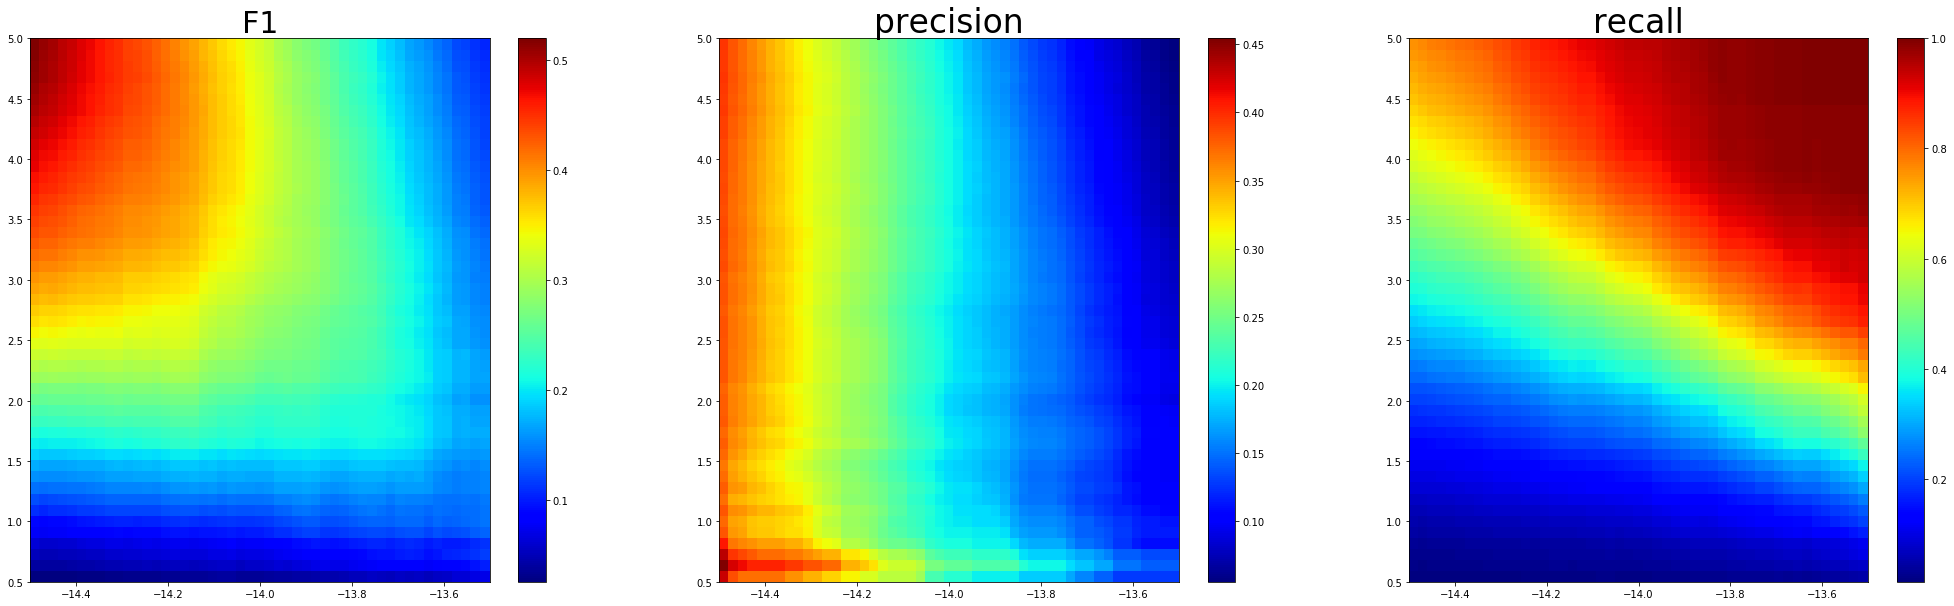

In [36]:
xx, yy = np.meshgrid(np.linspace(-14.5, -13.5, 50), np.linspace(0.5, 5., 50))
fig = plt.figure(figsize=[35, 10])
plt.subplot(1,3,1)
quadmesh = plt.pcolormesh(xx, yy, F1, cmap='jet')
plt.title('F1', fontsize=30)
plt.colorbar()
          
plt.subplot(1,3,2)
quadmesh = plt.pcolormesh(xx, yy, precision, cmap='jet')
plt.title('precision', fontsize=33)
plt.colorbar()
          
plt.subplot(1,3,3)
quadmesh = plt.pcolormesh(xx, yy, recall, cmap='jet')
plt.title('recall', fontsize=33)
plt.colorbar() 

обрежим данные вне 5 кпк

In [37]:
precision_cut=np.zeros((50,50))
recall_cut = np.zeros((50,50))
F1_cut = np.zeros((50,50))

for i, qlim in enumerate(np.linspace(0.5, 5., 50)):
    for j, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                if (dist_kpc[k][l] <= 5):
                    if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                        TP+=1
                    
                    if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                        FN+=1 
                    if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                        FP+=1
         
        precision_cut[i][j] = TP/(TP + FP)
        recall_cut[i][j] = TP/(TP + FN)
        F1_cut[i][j] = 2*precision_cut[i][j] * recall_cut[i][j]/(precision_cut[i][j] + recall_cut[i][j])

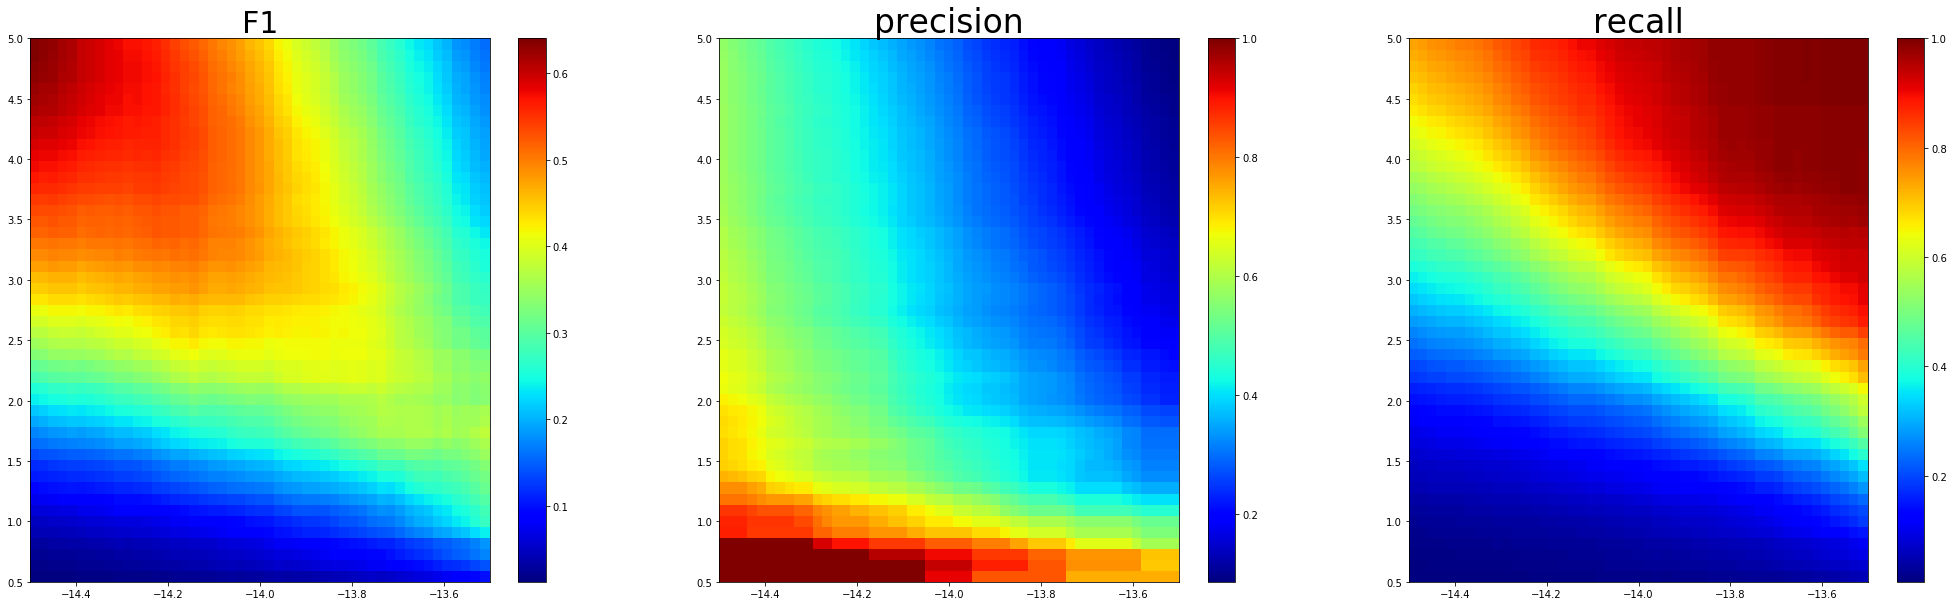

In [38]:
xx, yy = np.meshgrid(np.linspace(-14.5, -13.5, 50), np.linspace(0.5, 5., 50))
fig = plt.figure(figsize=[35, 10])
plt.subplot(1,3,1)
quadmesh = plt.pcolormesh(xx, yy, F1_cut, cmap='jet')
plt.title('F1', fontsize=30)
plt.colorbar()
          
plt.subplot(1,3,2)
quadmesh = plt.pcolormesh(xx, yy, precision_cut, cmap='jet')
plt.title('precision', fontsize=33)
plt.colorbar()
          
plt.subplot(1,3,3)
quadmesh = plt.pcolormesh(xx, yy, recall_cut, cmap='jet')
plt.title('recall', fontsize=33)
plt.colorbar() 

Теперь отдадим приоритет полноте

In [44]:
F1_recall = np.zeros((50,50))
beta_square = 2.

for i, qlim in enumerate(np.linspace(0.5, 5., 50)):
    for j, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        precision_Qmax = 0
        recall_Qmax = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (0. < Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (0. < Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
        precision = TP/(TP + FP)
        recall = TP/(TP + FN)
        F1_recall[i][j] = (beta_square+1)*precision * recall/(beta_square*precision + recall)

Приоритет полноте и обрежим область вне 5 кпк

In [45]:
F1_recall_cut = np.zeros((50,50))
beta_square = 2.

for i, qlim in enumerate(np.linspace(0.5, 5., 50)):
    for j, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
        TP = 0
        FP = 0
        FN = 0
        precision_Qmax = 0
        recall_Qmax = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                if (dist_kpc[k][l] <= 5):
                    if (0. < Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                        TP+=1
                     
                    if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                        FN+=1
                
                    if (0. < Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                        FP+=1
         
        precision = TP/(TP + FP)
        recall = TP/(TP + FN)
        F1_recall_cut[i][j] = (beta_square+1)*precision * recall/(beta_square*precision + recall)

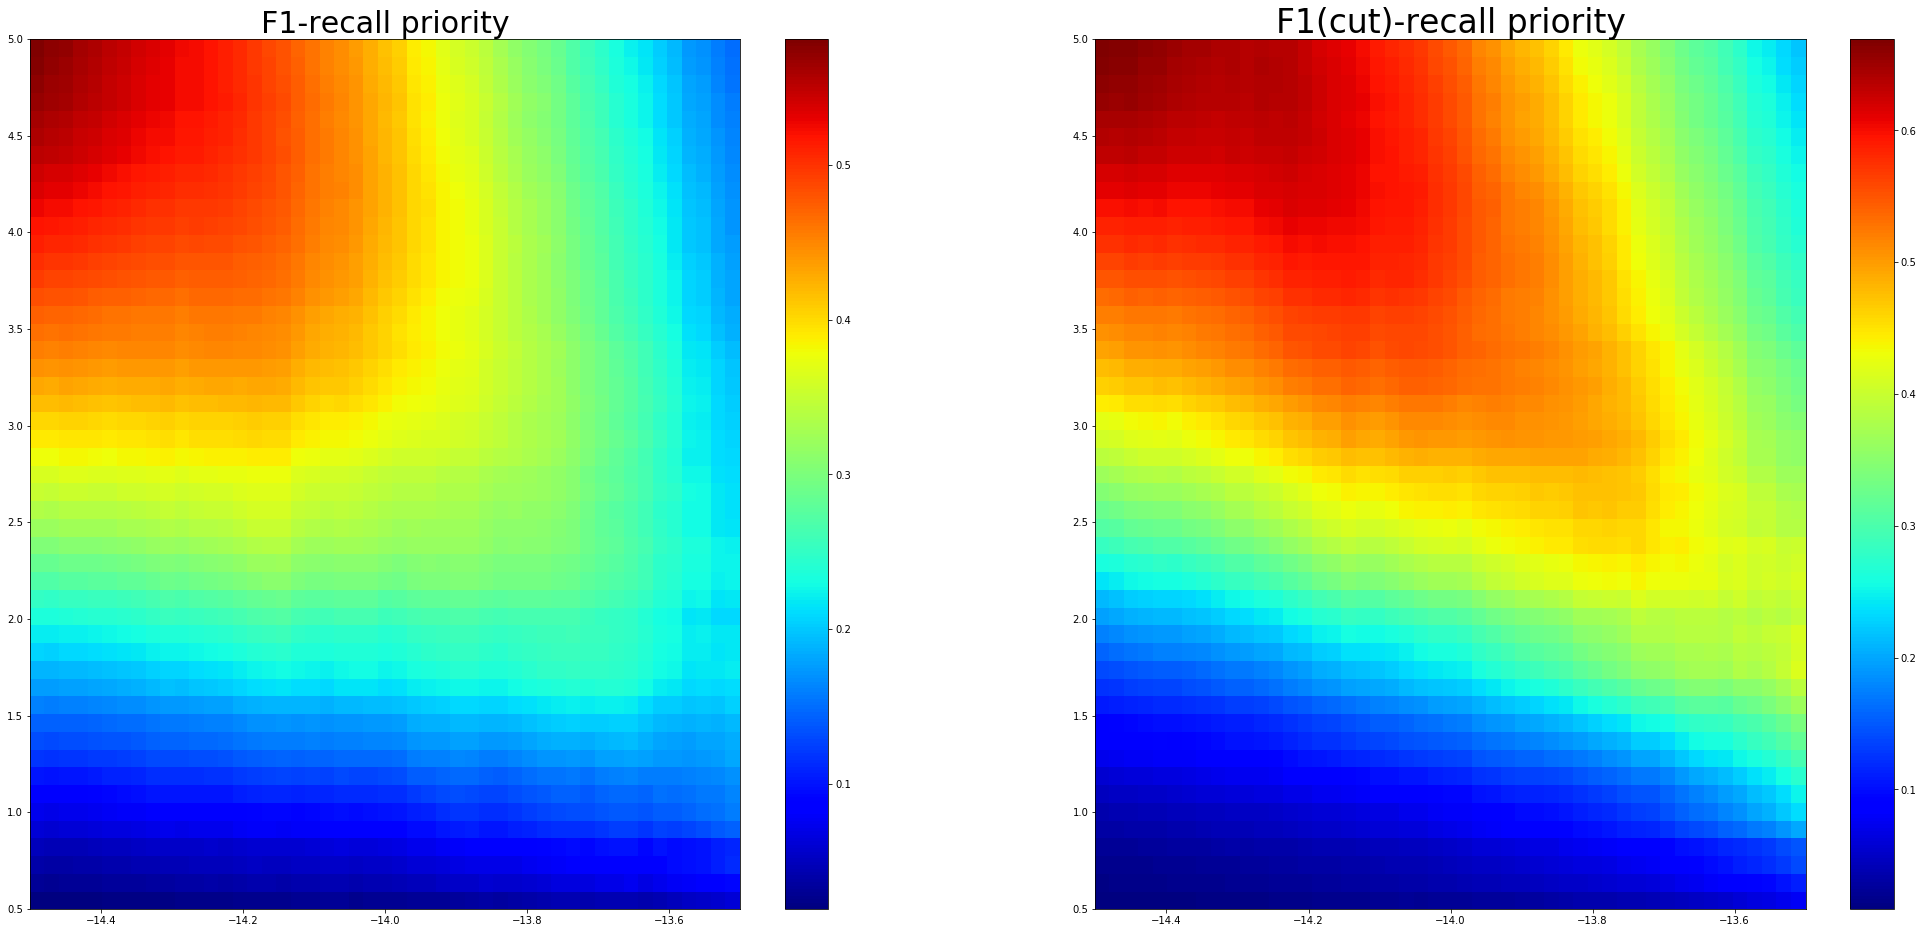

In [46]:
xx, yy = np.meshgrid(np.linspace(-14.5, -13.5, 50), np.linspace(0.5, 5., 50))
fig = plt.figure(figsize=[35, 16])
plt.subplot(1,2,1)
quadmesh = plt.pcolormesh(xx, yy, F1_recall, cmap='jet')
plt.title('F1-recall priority', fontsize=30)
plt.colorbar()
          
plt.subplot(1,2,2)
quadmesh = plt.pcolormesh(xx, yy, F1_recall_cut, cmap='jet')
plt.title('F1(cut)-recall priority', fontsize=33)
plt.colorbar()

Зафиксируем $Q_{lim} = 3$

In [40]:
precision3=[]
recall3 = []
F13 = []
qlim = 3.

for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
                
            if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                TP+=1
                   
            if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                FN+=1 
            if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                FP+=1
         
    precision3.append(TP/(TP + FP))
    recall3.append(TP/(TP + FN))
    F13.append(2*precision3[i] * recall3[i]/(precision3[i] + recall3[i]))

In [41]:
precision3_cut=[]
recall3_cut = []
F13_cut = []
qlim = 3.
for i, hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            if (dist_kpc[k][l] <= 5):
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1 
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
    precision3_cut.append(TP/(TP + FP))
    recall3_cut.append(TP/(TP + FN))
    F13_cut.append(2*precision3_cut[i] * recall3_cut[i]/(precision3_cut[i] + recall3_cut[i]))

In [48]:
F13_recall = []
beta_square = 2.
qlim = 3.
for i,  hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
    TP = 0
    FP = 0
    FN = 0
    precision_Qmax = 0
    recall_Qmax = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
              
            if (0. <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                TP+=1
                    
            if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                FN+=1
                
            if (0. <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                FP+=1
         
    precision = TP/(TP + FP)
    recall = TP/(TP + FN)
    F13_recall.append((beta_square+1)*precision * recall/(beta_square*precision + recall))

In [49]:
F13_recall_cut = []
beta_square = 2.
qlim = 3.
for i,  hlim in enumerate(np.linspace(-14.5, -13.5, 50)):
    TP = 0
    FP = 0
    FN = 0
    precision_Qmax = 0
    recall_Qmax = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            if (dist_kpc[k][l] <= 5):  
                if (0. <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1
                
                if (0. <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
    precision = TP/(TP + FP)
    recall = TP/(TP + FN)
    F13_recall_cut.append((beta_square+1)*precision * recall/(beta_square*precision + recall))

Теперь нарисуем графики для F1, precision и recall при Q_lim = 3 для полной, обрезанной карты и с приоритетом полноты.

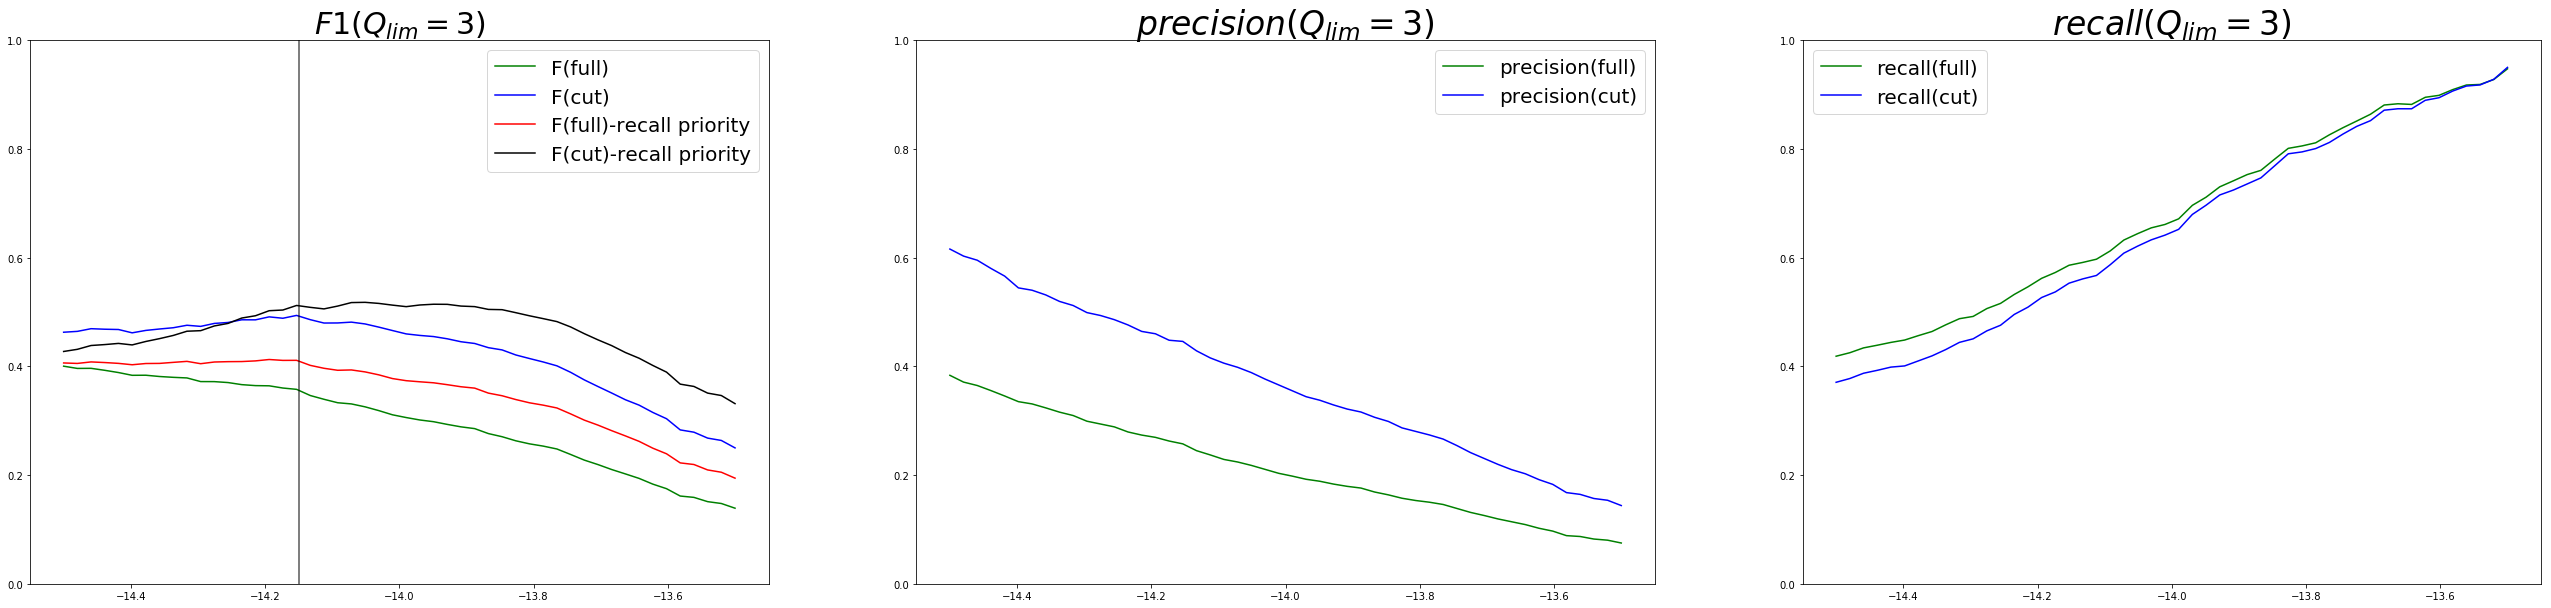

In [53]:
xx =np.array(np.linspace(-14.5, -13.5, 50))
fig = plt.figure(figsize=[45, 10])

plt.subplot(1,3,1)
plt.plot(xx,F13,'-', label='F(full)', color='green')
plt.plot(xx,F13_cut,'-', label='F(cut)', color='blue')
plt.plot(xx,F13_recall,'-', label='F(full)-recall priority', color='red')
plt.plot(xx,F13_recall_cut,'-', label='F(cut)-recall priority', color='black')
plt.ylim(0.,1.)
plt.title(r'$F1(Q_{lim} = 3)$', fontsize=30)
plt.axvline(x=-14.15, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,2)
plt.plot(xx,precision3,'-', label='precision(full)', color='green')
plt.plot(xx,precision3_cut,'-', label='precision(cut)', color='blue')
plt.title(r'$precision(Q_{lim} = 3)$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,3)
plt.plot(xx,recall3,'-', label='recall(full)', color='green')
plt.plot(xx,recall3_cut,'-', label='recall(cut)', color='blue')
plt.title(r'$recall(Q_{lim} = 3)$', fontsize=33)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)

Получается достаточно ярко выраженный пик для F-меры на log_H_alpha = -14.15 . Построим теперь двумепрные карты с такими пределами.  

Text(0.5, 1.0, '$Q_{eff}^{max}$')

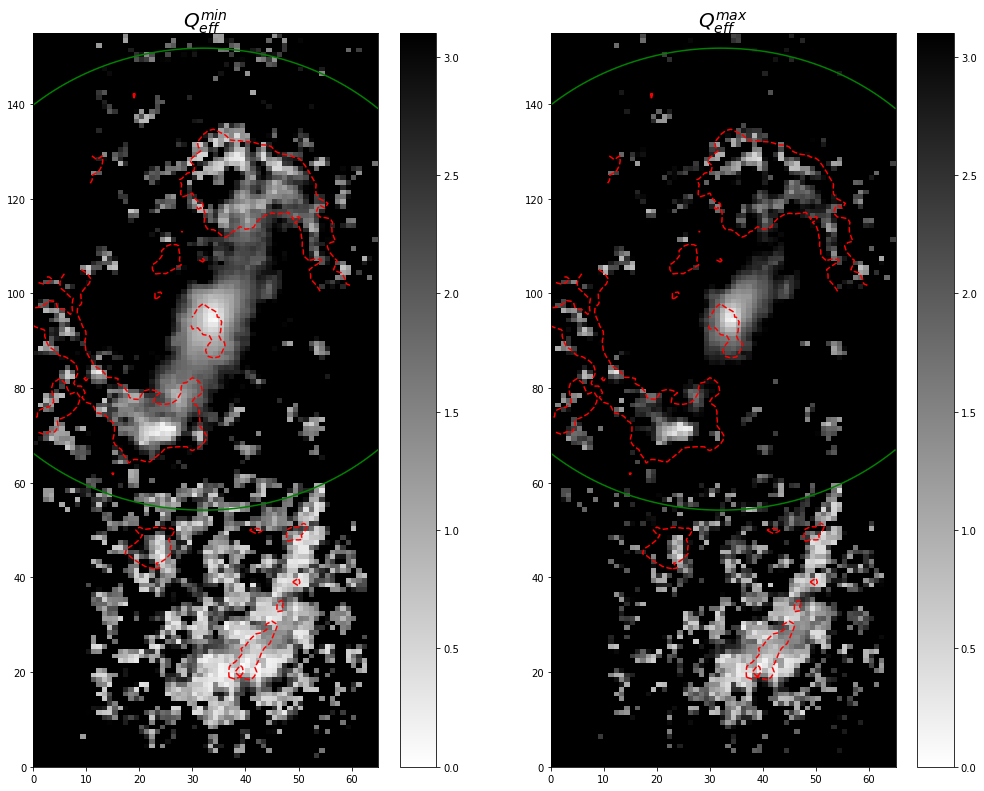

In [67]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.15,-12], aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, dist_kpc, levels=[0,5], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=0., vmax=3.1)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.15,-12], aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, dist_kpc, levels=[0,5], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=0., vmax=3.1)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

Изобразим закон К-Ш для полной и обрезанной карты

$$\Sigma_{SFR}\propto {\Sigma_{gas}}^N$$, где $N=1.4,1.5$ 

$\Sigma_{SFR}\propto H_{\alpha}$, поэтому этот закон справедлив и для $H_{\alpha}$

Пусть $\Sigma_{SFR} = k\cdot H_{\alpha}$, тогда $\log{k}+\log{H_{\alpha}} \propto N\cdot log{\Sigma_{gas}}$

In [4]:
Sigma_H2 = np.load('./data/Sigma_H2.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
H_alpha = np.load('./data/H_alpha.npy')
dist_kpc = np.load('./data/dist_kpc.npy')

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


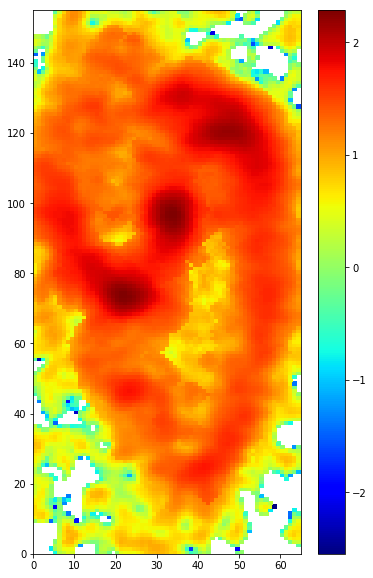

In [5]:
mask = (H_alpha != 0.)
Sigma_g = np.zeros(dist_kpc.shape)
Sigma_g = 1.36*(Sigma_HI + Sigma_H2)
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[6,10])
quadmesh = plt.pcolormesh(X, Y,np.log10(Sigma_g), cmap='jet')
plt.colorbar()

In [41]:
counts = np.zeros((50,30)) 
counts_cut = np.zeros((50,30))

for j, gas in enumerate(np.linspace(0.7, 2.2, 30)):
    for i, hlim in enumerate(np.linspace(-16., -13.5, 50)):
       
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (H_alpha[k][l] != 0.):
                    if (gas <= np.log10(Sigma_g[k][l]) <= gas+0.05) & (hlim <= np.log10(H_alpha[k][l]) <= hlim+0.05):
                        counts[i][j]+=1
                
                if (dist_kpc[k][l] <= 5) & (H_alpha[k][l] != 0.):
                    if (gas <= np.log10(Sigma_g[k][l]) <= gas+0.05) & (hlim <= np.log10(H_alpha[k][l]) <= hlim+0.05):
                        counts_cut[i][j]+=1    

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


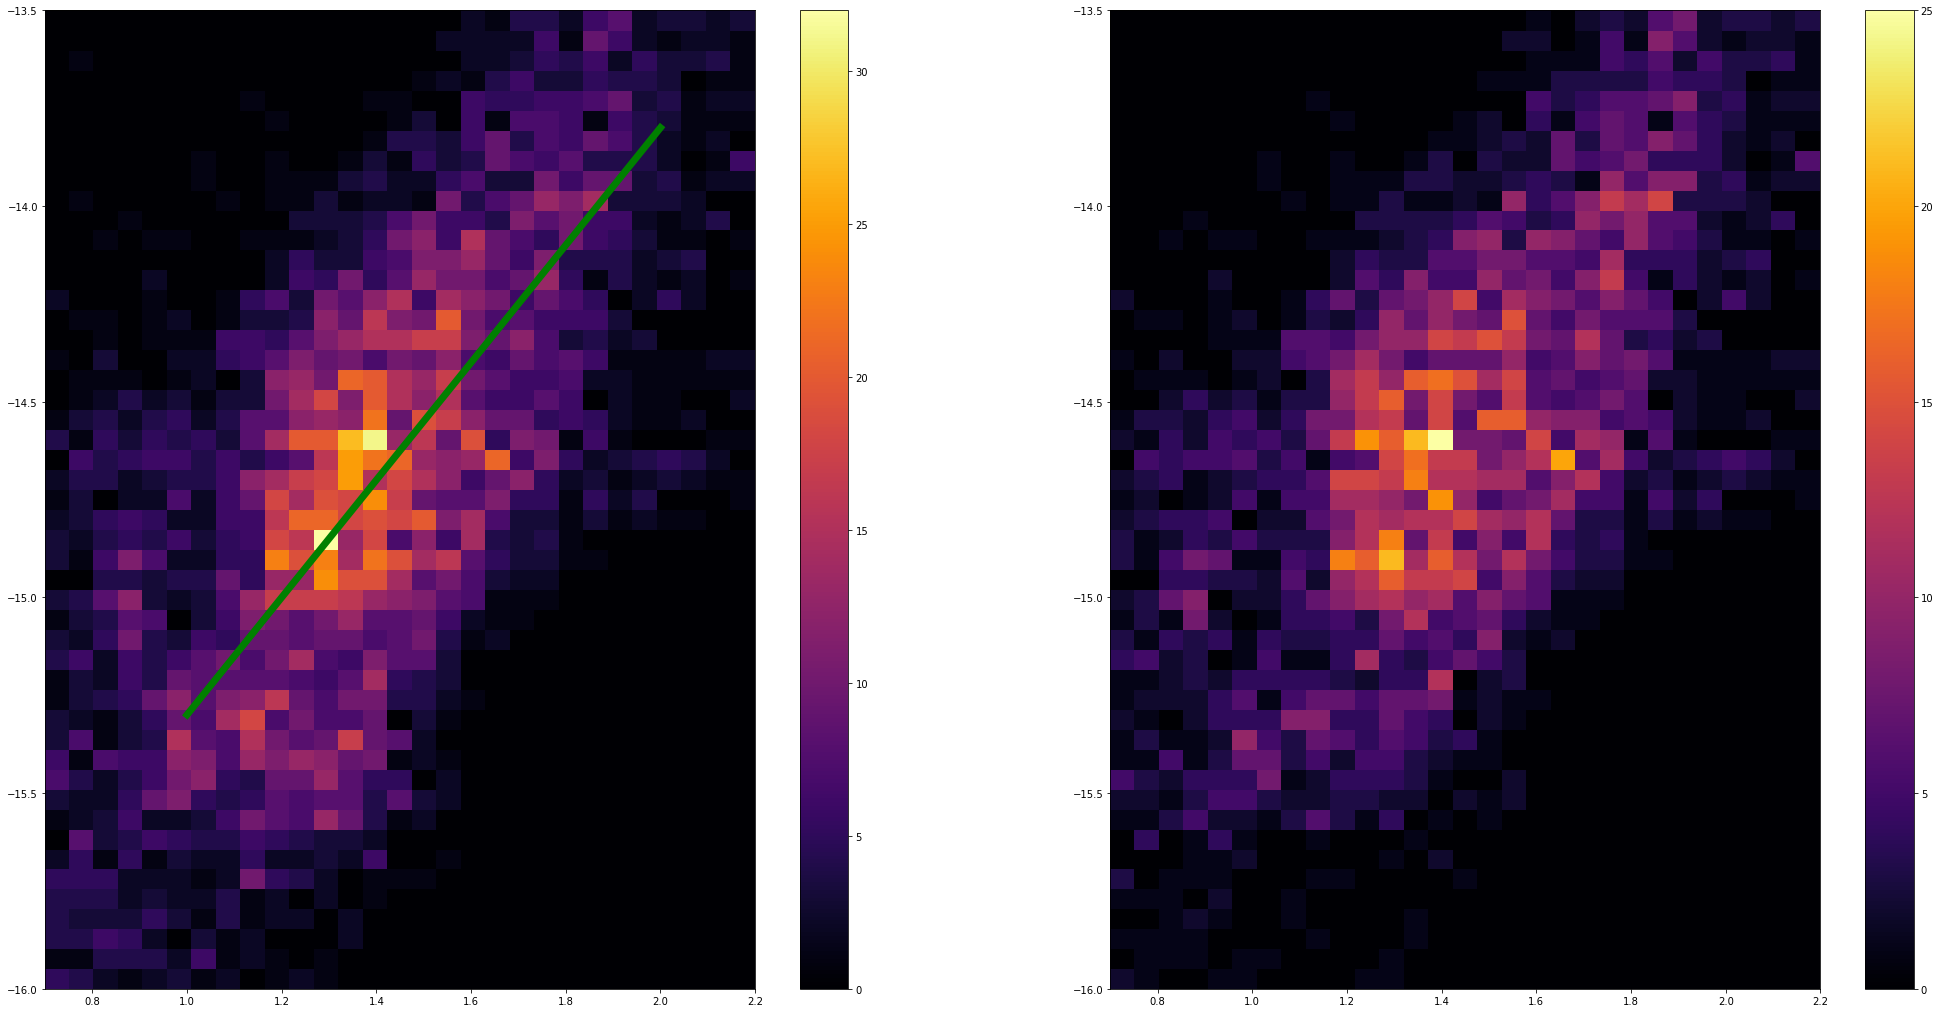

In [43]:
xx, yy = np.meshgrid(np.linspace(0.7, 2.2, 30),np.linspace(-16., -13.5, 50))
fig = plt.figure(figsize=[35, 18])

plt.subplot(1,2,1)

quadmesh = plt.pcolormesh(xx, yy, counts, cmap='inferno')
#quadmesh.set_clim(vmin=0., vmax=12.5)
a = 1.5
b = -16.8
#В принципе похоже на закон К-Ш со степенью N=1.5,
#чтобы понять это точно нужно найти во сколько Sigma_SFR отличается от H_alpha
plt.plot([1., 2.], [1.*a+b, 2.*a+b], '-', lw=7, color='g')
plt.colorbar()
          
plt.subplot(1,2,2)
quadmesh = plt.pcolormesh(xx, yy, counts_cut, cmap='inferno')
#quadmesh.set_clim(vmin=0., vmax=12.5)
plt.colorbar()

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


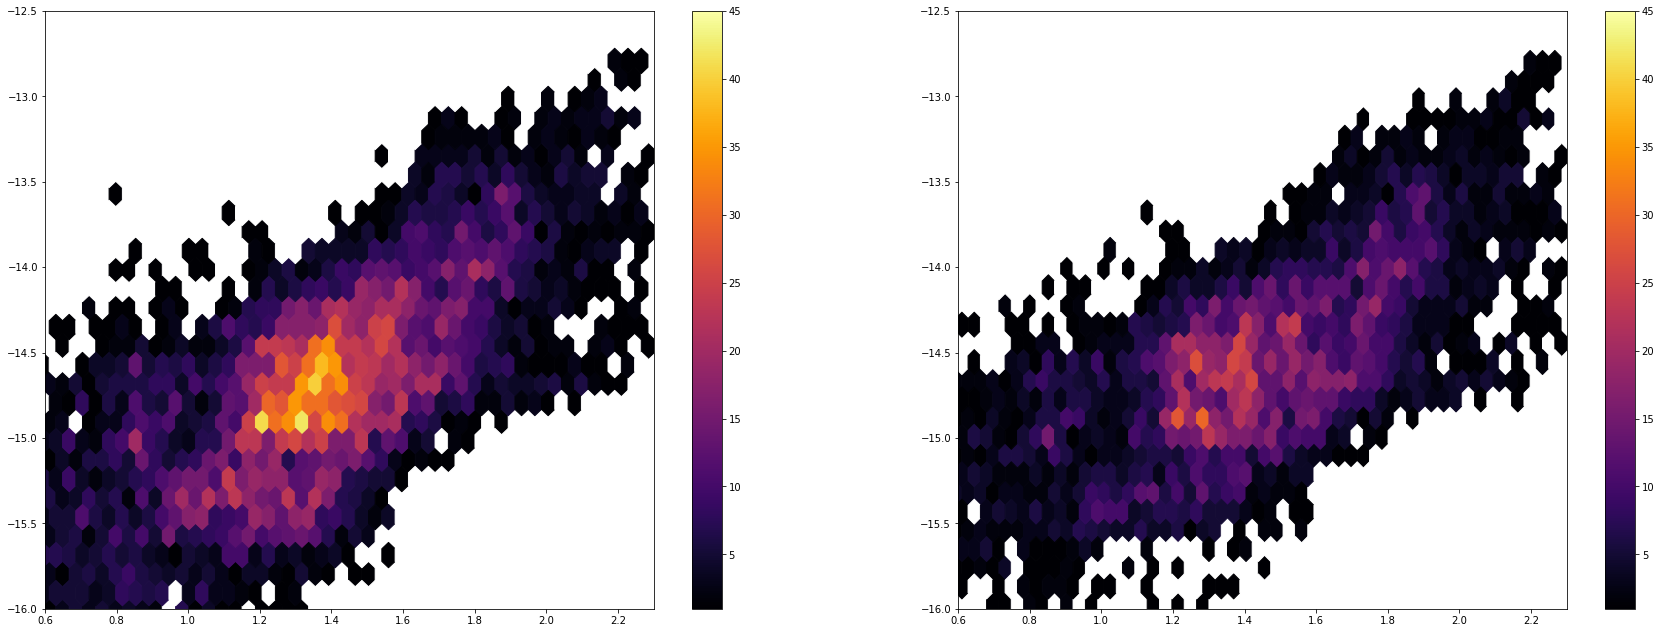

In [44]:
fig = plt.figure(figsize=[30,11])
plt.subplot(1,2,1)

mask = (H_alpha!=0)
x = np.nan_to_num(np.log10(H_alpha[mask].ravel()))
y = np.nan_to_num(np.log10(Sigma_g[mask].ravel()))
hb = plt.hexbin(y, x, gridsize=130, cmap=cm.inferno, vmin=1, vmax=45)
hb.cmap.set_under('white')

a = 1.48
b = -4.13
plt.plot([0.5, 1.5], [0.5*a+b, 1.5*kslaw+kslaw_bias], '-', lw=7, color='g')
plt.ylabel(r'$\log \Sigma_\mathrm{SFR}$', fontsize=fs)

plt.xlim(0.6, 2.3)
plt.ylim(-16, -12.5)
plt.colorbar()

plt.subplot(1,2,2)
mask = (H_alpha!=0) & (dist_kpc<=5)
x = np.nan_to_num(np.log10(H_alpha[mask].ravel()))
y = np.nan_to_num(np.log10(Sigma_g[mask].ravel()))

hb = plt.hexbin(y, x, gridsize=130, cmap=cm.inferno, vmin=1, vmax=45)
hb.cmap.set_under('white')
plt.xlim(0.6, 2.3)
plt.ylim(-16, -12.5)
plt.colorbar()
